# AutoDecoders on the ModelNet 10 data

### Change directory to kaolin

The kaolin library must be downloaded from <https://github.com/NVIDIAGameWorks/kaolin> and installed with instructions from their README

### Note: The setenv.sh script must be run to set up proper kaolin paths

In [1]:
# import necessary libraries
import kaolin as kal
from kaolin.datasets import modelnet
from torch.utils.data import DataLoader
from torchvision import transforms

import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from utils import visualize_npy
from functools import partial

%matplotlib inline

   No module named 'nuscenes'
   None


Traceback (most recent call last):
  File "/home/mmvc/.conda/envs/sms1198_env/lib/python3.7/site-packages/kaolin-0.1.0-py3.7-linux-x86_64.egg/kaolin/datasets/__init__.py", line 11, in <module>
    from .nusc import NuscDetection
  File "/home/mmvc/.conda/envs/sms1198_env/lib/python3.7/site-packages/kaolin-0.1.0-py3.7-linux-x86_64.egg/kaolin/datasets/nusc.py", line 21, in <module>
    from nuscenes.utils.geometry_utils import transform_matrix
ModuleNotFoundError: No module named 'nuscenes'


## Kaolin mesh to point cloud conversion functions

In [2]:
def convert_mesh_to_pt_cloud(mesh, num_points=5000):
    return kal.conversions.trianglemesh_to_pointcloud(mesh, num_points)[0]

In [3]:
modelnet10_category_list = ['bathtub', 'bed',        'chair',  'desk',  'dresser',
                            'monitor', 'night_stand', 'sofa',  'table',  'toilet']

modelnet40_category_list = ['airplane', 'bench', 'bowl', 'cone', 'desk', 'flower_pot', 'keyboard', 'mantel', 'person', 'radio',
                            'sofa', 'table', 'tv_stand', 'xbox', 'bathtub', 'bookshelf', 'car', 'cup', 'door', 'glass_box', 'lamp', 'monitor',
                            'piano', 'range_hood', 'stairs', 'tent', 'vase', 'bed', 'bottle', 'chair', 'curtain', 'dresser',
                            'guitar', 'laptop', 'night_stand', 'plant', 'sink', 'stool', 'toilet', 'wardrobe']

### Loads the `.off` files from ModelNet as torch.Tensors and saves them as `.npy` files for faster loading

In [9]:
def unload_off_to_npy(category_list, split='train', src_dir='./data/ModelNet10/', dump_npy_dir='./data/ModelNet10_train_npy/'):
    for category in category_list:
        dump_npy_file = 'modelnet_'+category+'.npy'
        npy_dump_file = Path(dump_npy_dir+dump_npy_file)
        if npy_dump_file.is_file():
            print(f"{dump_npy_dir+dump_npy_file} already exists. Skipping now")
            continue

        print(f"Unloading {category} to npy")
        mdnet = modelnet.ModelNet(root=src_dir, categories=[category], split=split,
                                  transform=transforms.Compose([convert_mesh_to_pt_cloud]))
        print(len(mdnet))
        # data_loader = DataLoader(mdnet, batch_size=1,
        #                         shuffle=True, num_workers=0)
        X = None
        # Load the entire .off files into one Tensor object X one at a time
        for i in range(len(mdnet)):
            try:
                if X is None:
                    X = mdnet[i][0].unsqueeze(0)
                else:
                    X = torch.cat([X, mdnet[i][0].unsqueeze(0)], dim=0)
            except Exception as e:
                print(e)
                print(f"Skipped {i}")
            if i % 20:
                if X is not None:
                    print(X.shape)

        dump_npy_file = 'modelnet_'+category+'.npy'
        if X is not None:
            np.save(dump_npy_dir+dump_npy_file, X.numpy())
            print(
                f"Dumped category {category} with shape {X.shape} under {dump_npy_dir} as {dump_npy_file}")
            return
        print("Invalid off file. Count not read any values")

# Unload all .off files into a .npy pickle format

WARNING: Requires a lot of time

The original `.off` ModelNet10 files must be downloaded from <https://modelnet.cs.princeton.edu/>

In [12]:
# unload ModelNet40 off to npy
unload_off_to_npy(modelnet40_category_list, split='train', src_dir='./data/ModelNet40/', dump_npy_dir='./data/ModelNet40_train_npy/')
unload_off_to_npy(modelnet40_category_list, split='test', src_dir='./data/ModelNet40/', dump_npy_dir='./data/ModelNet40_test_npy/')

./data/ModelNet40_test_npy/modelnet_airplane.npy already exists. Skipping now
./data/ModelNet40_test_npy/modelnet_bench.npy already exists. Skipping now
./data/ModelNet40_test_npy/modelnet_bowl.npy already exists. Skipping now
./data/ModelNet40_test_npy/modelnet_cone.npy already exists. Skipping now
Unloading desk to npy
86
invalid literal for int() with base 10: '12.992150'
Skipped 0
invalid literal for int() with base 10: '31.023650'
Skipped 1
invalid literal for int() with base 10: '-15.748050'
Skipped 2
invalid literal for int() with base 10: '-38.853335'
Skipped 3
invalid literal for int() with base 10: '12.303126'
Skipped 4
invalid literal for int() with base 10: '-9.000594'
Skipped 5
invalid literal for int() with base 10: '-7.495395'
Skipped 6
invalid literal for int() with base 10: '1.065600'
Skipped 7
invalid literal for int() with base 10: '15.240715'
Skipped 8
invalid literal for int() with base 10: '3.240300'
Skipped 9
invalid literal for int() with base 10: '17.519701'
Sk

Skipped 32
invalid literal for int() with base 10: '-16.339130'
Skipped 33
invalid literal for int() with base 10: '9.000000'
Skipped 34
invalid literal for int() with base 10: '-17.519700'
Skipped 35
invalid literal for int() with base 10: '-17.228720'
Skipped 36
invalid literal for int() with base 10: '17.913400'
Skipped 37
invalid literal for int() with base 10: '-14.960640'
Skipped 38
invalid literal for int() with base 10: '3.277350'
Skipped 39
invalid literal for int() with base 10: '66.374950'
Skipped 40
invalid literal for int() with base 10: '17.517000'
Skipped 41
invalid literal for int() with base 10: '14.750000'
Skipped 42
invalid literal for int() with base 10: '-15.998990'
Skipped 43
invalid literal for int() with base 10: '20.078745'
Skipped 44
invalid literal for int() with base 10: '-378.958000'
Skipped 45
invalid literal for int() with base 10: '17.539210'
Skipped 46
invalid literal for int() with base 10: '14.249998'
Skipped 47
invalid literal for int() with base 10:

invalid literal for int() with base 10: '8.875000'
Skipped 70
invalid literal for int() with base 10: '11.404850'
Skipped 71
invalid literal for int() with base 10: '-22.834650'
Skipped 72
invalid literal for int() with base 10: '14.022000'
Skipped 73
invalid literal for int() with base 10: '0.242775'
Skipped 74
invalid literal for int() with base 10: '10.500000'
Skipped 75
invalid literal for int() with base 10: '-16.000000'
Skipped 76
invalid literal for int() with base 10: '375.000000'
Skipped 77
invalid literal for int() with base 10: '18.941816'
Skipped 78
invalid literal for int() with base 10: '13.562650'
Skipped 79
invalid literal for int() with base 10: '-18.688900'
Skipped 80
invalid literal for int() with base 10: '12.063000'
Skipped 81
invalid literal for int() with base 10: '12.401600'
Skipped 82
invalid literal for int() with base 10: '6.574750'
Skipped 83
invalid literal for int() with base 10: '12.577000'
Skipped 84
invalid literal for int() with base 10: '11.224750'
Sk

invalid literal for int() with base 10: '-1.609468'
Skipped 51
invalid literal for int() with base 10: '-2.000000'
Skipped 52
invalid literal for int() with base 10: '-1.538945'
Skipped 53
invalid literal for int() with base 10: '0.148175'
Skipped 54
invalid literal for int() with base 10: '-71.993000'
Skipped 55
invalid literal for int() with base 10: '-0.335090'
Skipped 56
invalid literal for int() with base 10: '-0.121145'
Skipped 57
invalid literal for int() with base 10: '-2.315822'
Skipped 58
invalid literal for int() with base 10: '1.681760'
Skipped 59
invalid literal for int() with base 10: '-1.051594'
Skipped 60
invalid literal for int() with base 10: '-1.408105'
Skipped 61
invalid literal for int() with base 10: '175.125000'
Skipped 62
invalid literal for int() with base 10: '1.279300'
Skipped 63
invalid literal for int() with base 10: '8.906350'
Skipped 64
invalid literal for int() with base 10: '-0.728300'
Skipped 65
invalid literal for int() with base 10: '-0.685240'
Skipp

invalid literal for int() with base 10: '8.464550'
Skipped 76
invalid literal for int() with base 10: '-9.350351'
Skipped 77
invalid literal for int() with base 10: '-9.500000'
Skipped 78
invalid literal for int() with base 10: '-8.750000'
Skipped 79
invalid literal for int() with base 10: '-137.729500'
Skipped 80
invalid literal for int() with base 10: '9.437500'
Skipped 81
invalid literal for int() with base 10: '-9.500000'
Skipped 82
invalid literal for int() with base 10: '8.109375'
Skipped 83
invalid literal for int() with base 10: '-24.816000'
Skipped 84
invalid literal for int() with base 10: '-9.437500'
Skipped 85
Invalid off file. Count not read any values
./data/ModelNet40_test_npy/modelnet_guitar.npy already exists. Skipping now
./data/ModelNet40_test_npy/modelnet_laptop.npy already exists. Skipping now
Unloading night_stand to npy
86
invalid literal for int() with base 10: '-6.381020'
Skipped 0
invalid literal for int() with base 10: '8.500010'
Skipped 1
invalid literal for

In [ ]:
# unload ModelNet10 off to npy
unload_off_to_npy(modelnet10_category_list, split='train', src_dir='./data/ModelNet10/', dump_npy_dir='./data/ModelNet10_train_npy/')
unload_off_to_npy(modelnet10_category_list, split='test', src_dir='./data/ModelNet10/', dump_npy_dir='./data/ModelNet10_test_npy/')

## Library imports for autodecoder ensemble nets

In [27]:
import os
import sys
import time
import math
import random
import numpy as np
import matplotlib.pylab as plt

from pathlib import Path

# Try importing tqdm notebook
try:
    from tqdm.notebook import tqdm
except ModuleNotFoundError as e:
    print('tdqm.notebook not found. Try updating tdqm. Reverting to base tqdm', e)
    import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import joblib
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hinge_loss, log_loss
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, roc_curve

# CUSTOM IMPORTS

# utility functions
from src.utils import get_train_test_split_from_npy, get_X_y_from_npy, count_unique_labels
from src.utils import chamfer_loss, visualize_npy, print_model_metrics, HyperParameter, DirectorySetting

# models
from src.models import AutoDecoder, EnsembleAutoDecoder, CompNet, EnsembleCompNet

# datasets
from src.datasets import PointDriftDS, EncodingDS, PointNetDS

# train and test modules
from src.trainer import return_decoder_train_test_encoding_ds
from src.trainer import find_encoding, train_decoder, eval_decoder, train_compnet, eval_compnet

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

tdqm.notebook not found. Try updating tdqm. Reverting to base tqdm No module named 'tqdm.notebook'


-------
## Declaring the required modules and functions

### Setting up CUDA devices

In [3]:
device = None
use_cuda = torch.cuda.is_available()

if use_cuda:
    # inbuilt cudnn auto-tuner searches for best algorithm for hardware
    # cuddn.benchmark should be set to True when our input size does not vary
    torch.backends.cudnn.benchmark = True
    print("GPU training available")
    device = torch.device("cuda:0")
    print(f"Index of CUDA device in use is {torch.cuda.current_device()}")
else:
    print("GPU training NOT available")
    device = torch.device("cpu")
    print("Can only train on CPU")

GPU training available
Index of CUDA device in use is 0


In [4]:
DEBUG = True
SEED  = 17*19

HP = HyperParameter(epochs=10,
                    l2_reg=None, 
                    batch_size=16,
                    num_point_cloud=3,
                    encoding_iters=1000, 
                    encoding_size=256)
DS = DirectorySetting()

np.random.seed(SEED)
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed(SEED)

# Load the ModelNet10 data

In [2]:
# Load the X_train, X_test, y_train, y_test after reading from the .npy file in the disk
train = './data/ModelNet10_train_npy/'
test = './data/ModelNet10_test_npy/'

# Warning: The train and test directories must have the same number of files
X_train, y_train = get_X_y_from_npy(train, 100)
X_test, y_test = get_X_y_from_npy(test, 100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Adding data/ModelNet10_train_npy/modelnet_chair.npy to X. X is now (889, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_sofa.npy to X. X is now (1569, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_night_stand.npy to X. X is now (1769, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_bed.npy to X. X is now (2284, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_table.npy to X. X is now (2676, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_toilet.npy to X. X is now (3020, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_monitor.npy to X. X is now (3485, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_bathtub.npy to X. X is now (3591, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_dresser.npy to X. X is now (3791, 5000, 3)
Adding data/ModelNet10_train_npy/modelnet_desk.npy to X. X is now (3991, 5000, 3)
Adding data/ModelNet10_test_npy/modelnet_chair.npy to X. X is now (100, 5000, 3)
Adding data/ModelNet10_test_npy/modelnet_sofa.npy to X. X is now (200, 5000, 3)
A

((3991, 5000, 3), (908, 5000, 3), (3991, 1), (908, 1))

## Testing our AutoDecoder and CompNets with the ModelNet10 data

### Looking at the ModelNet10 data

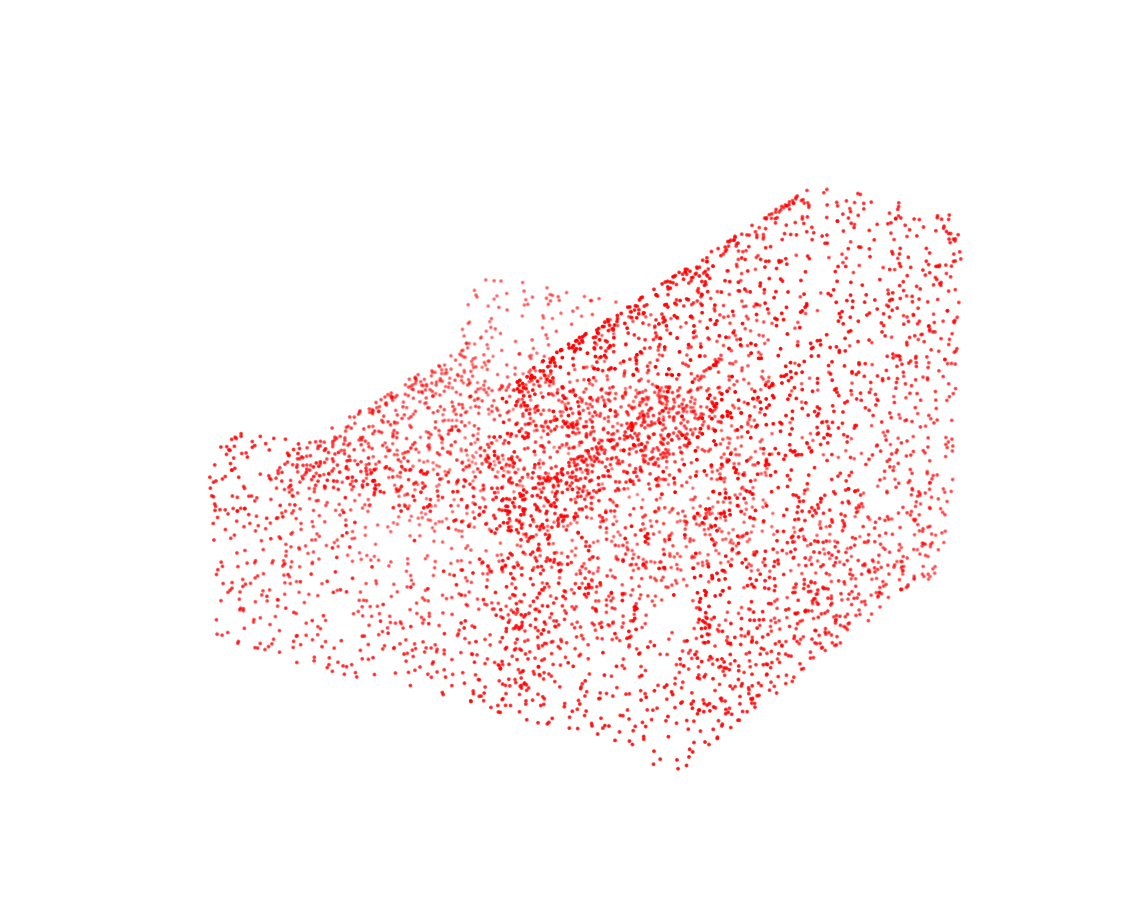

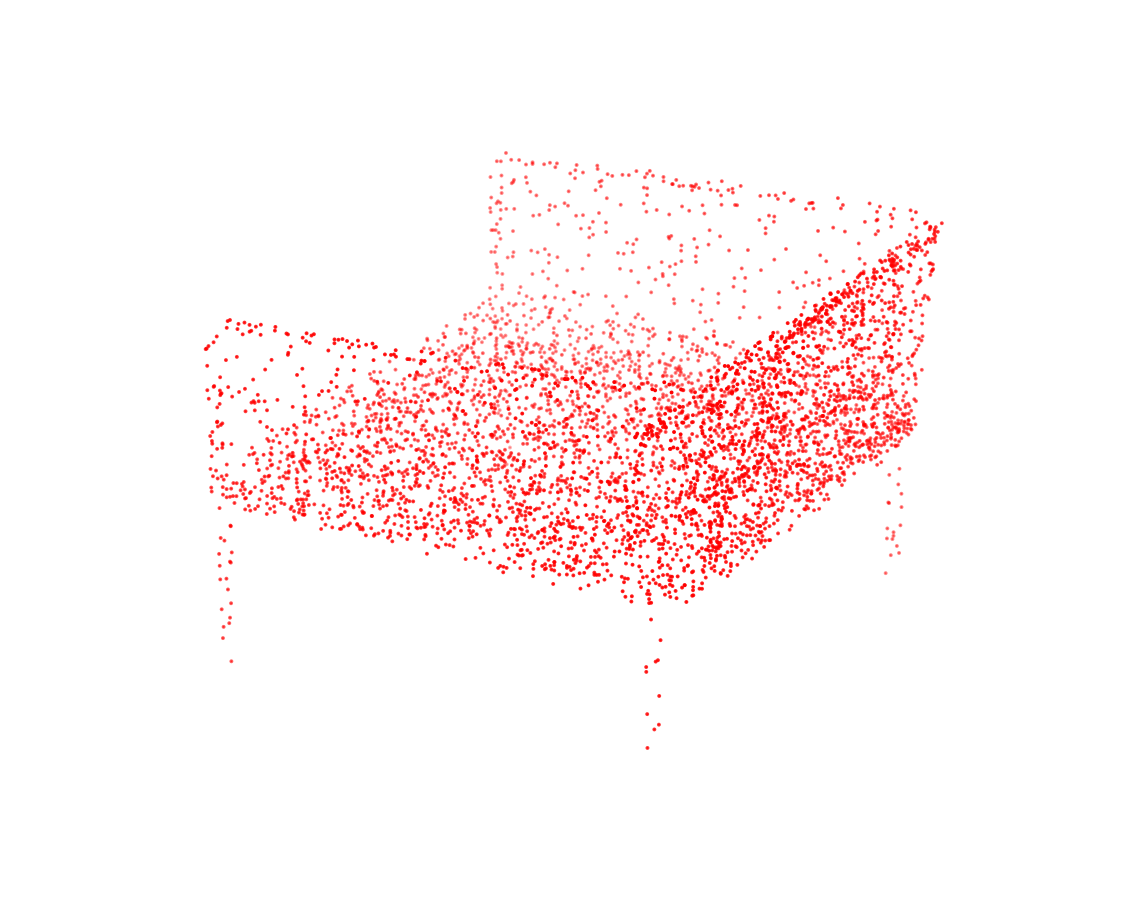

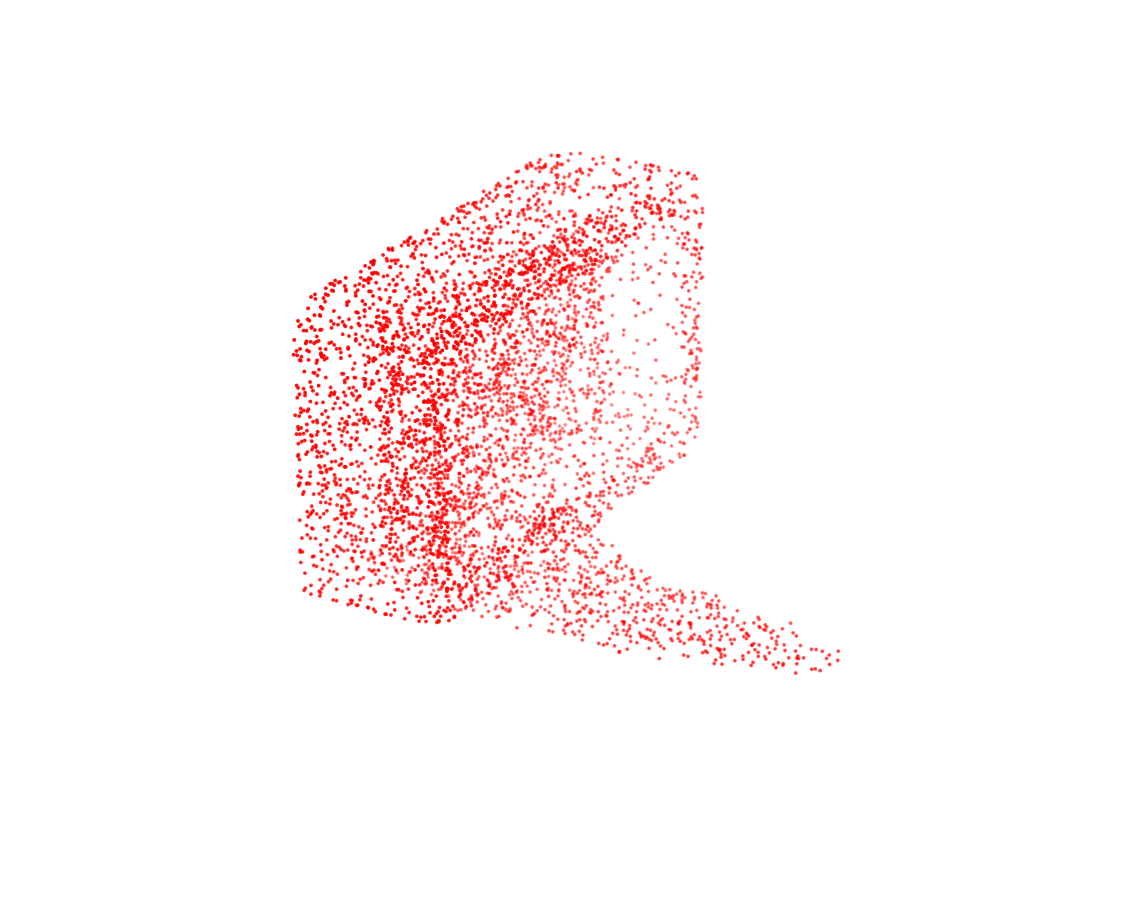

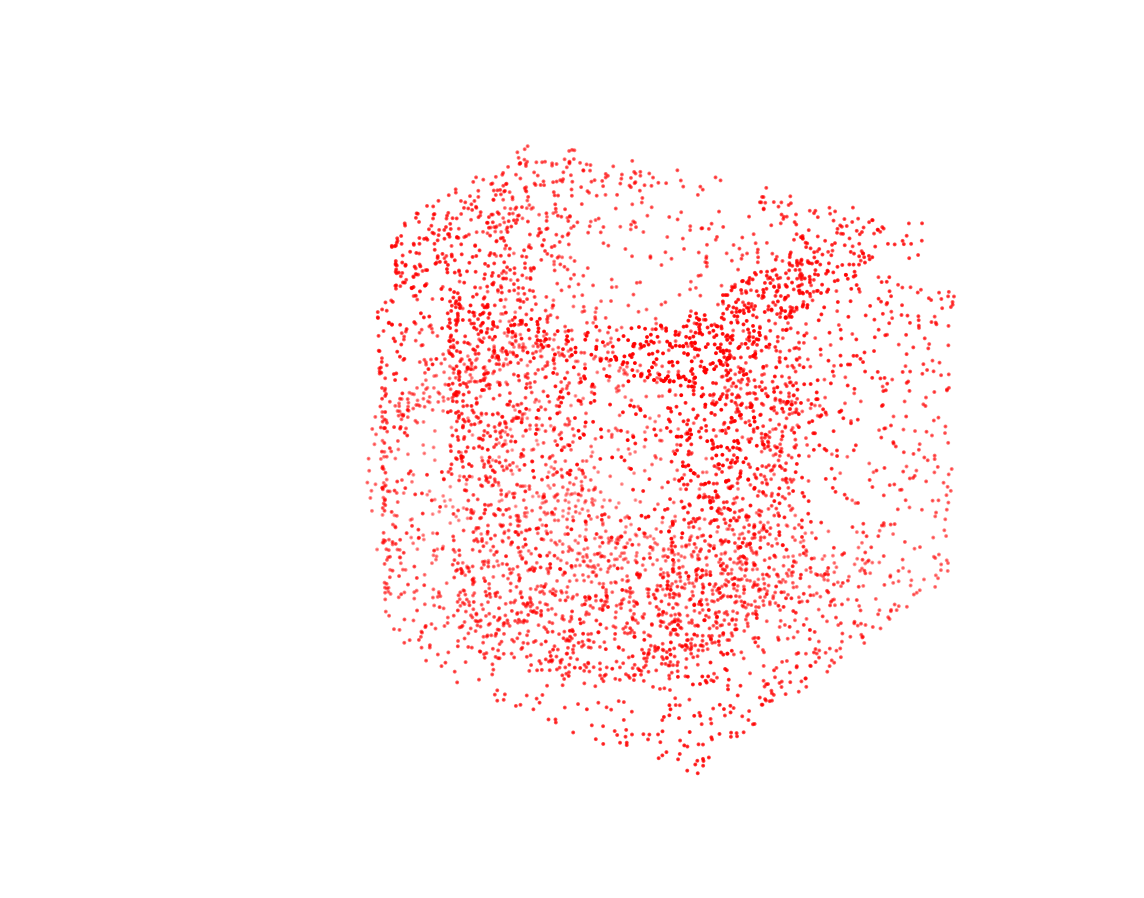

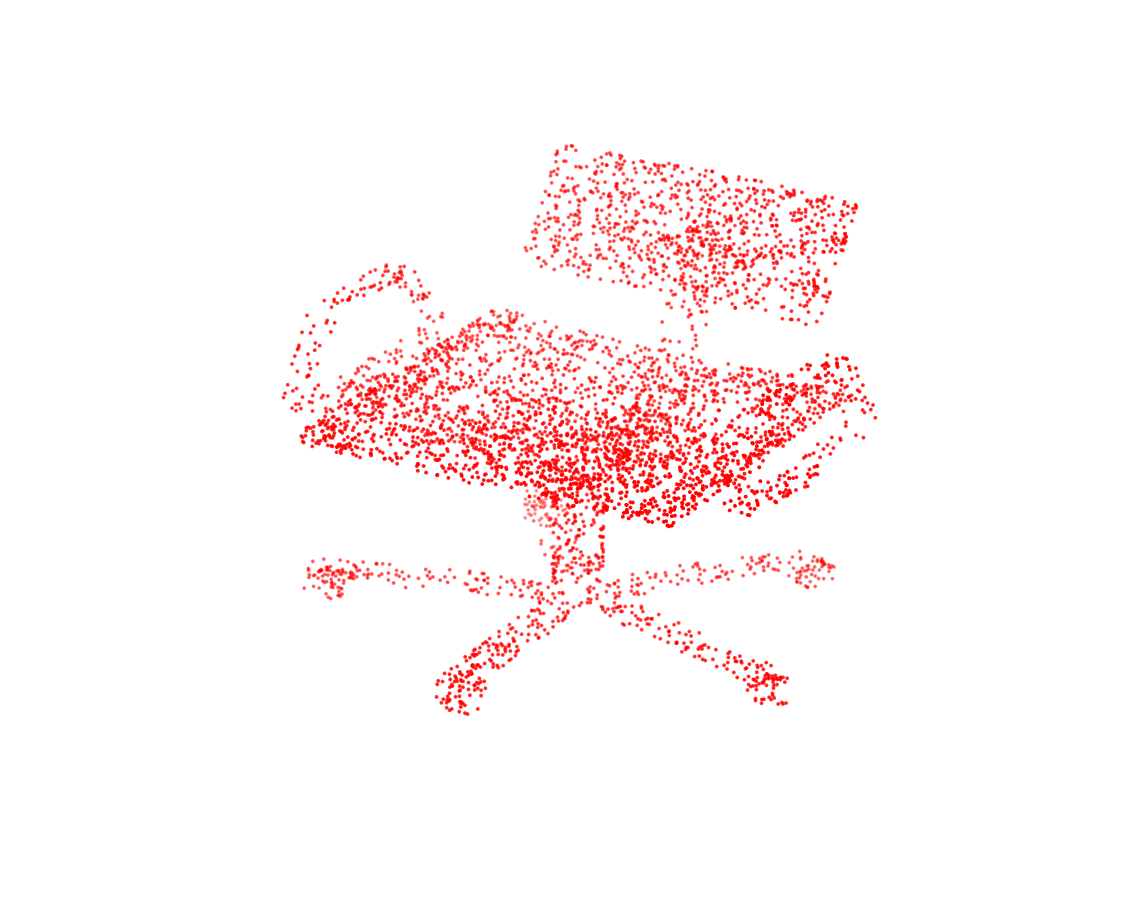

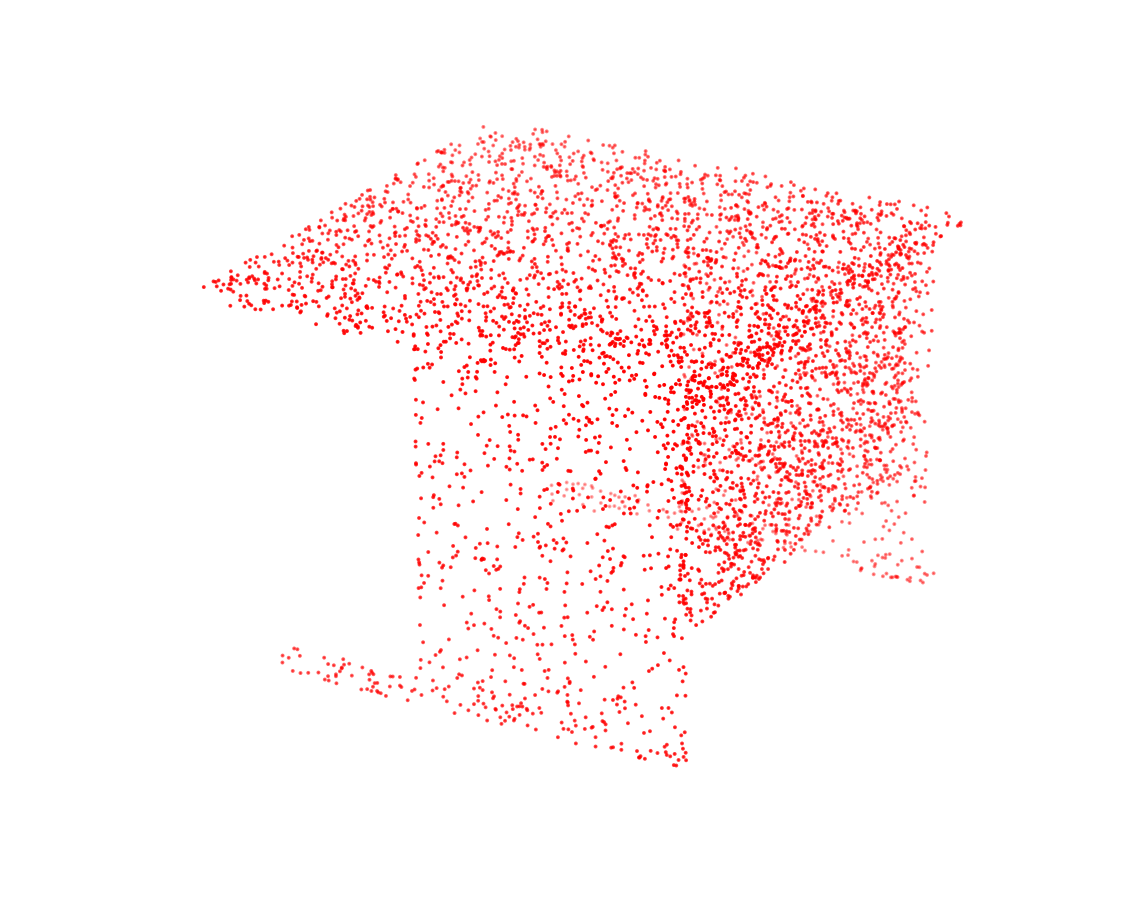

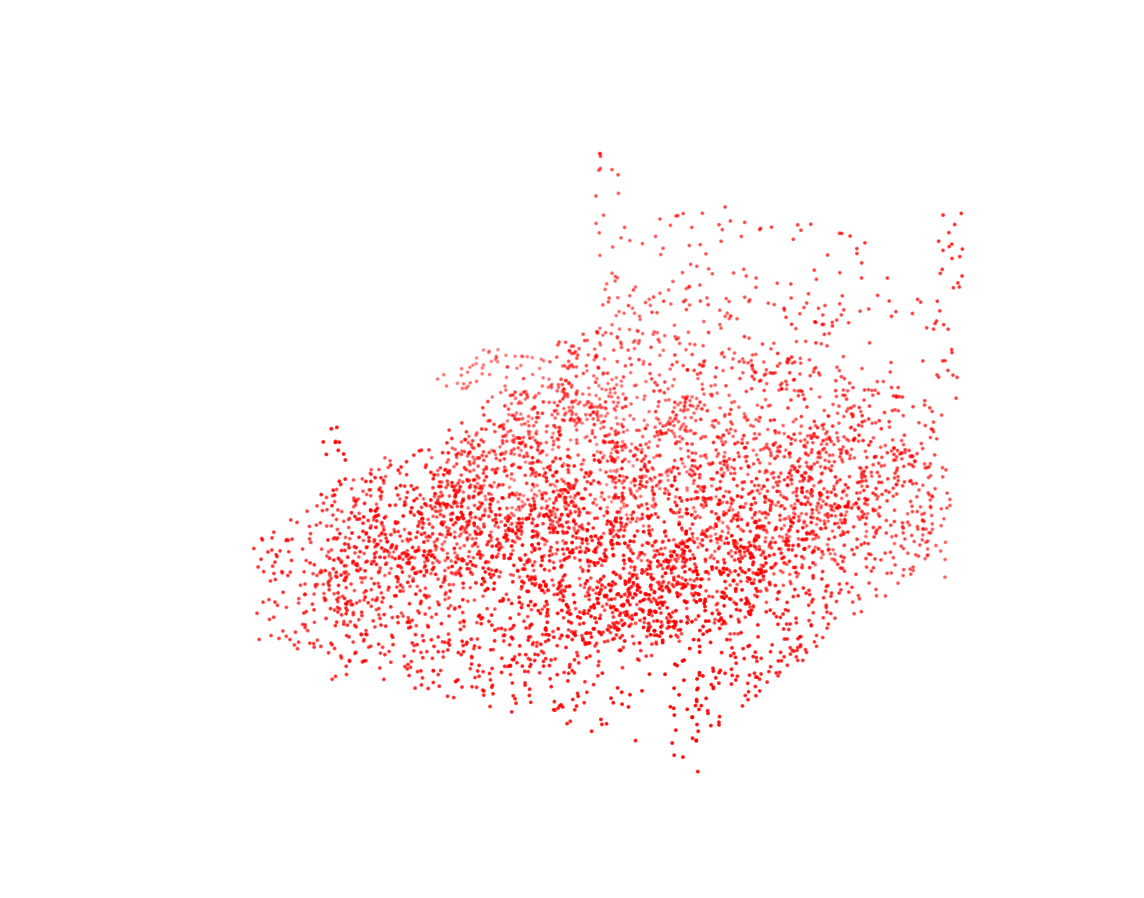

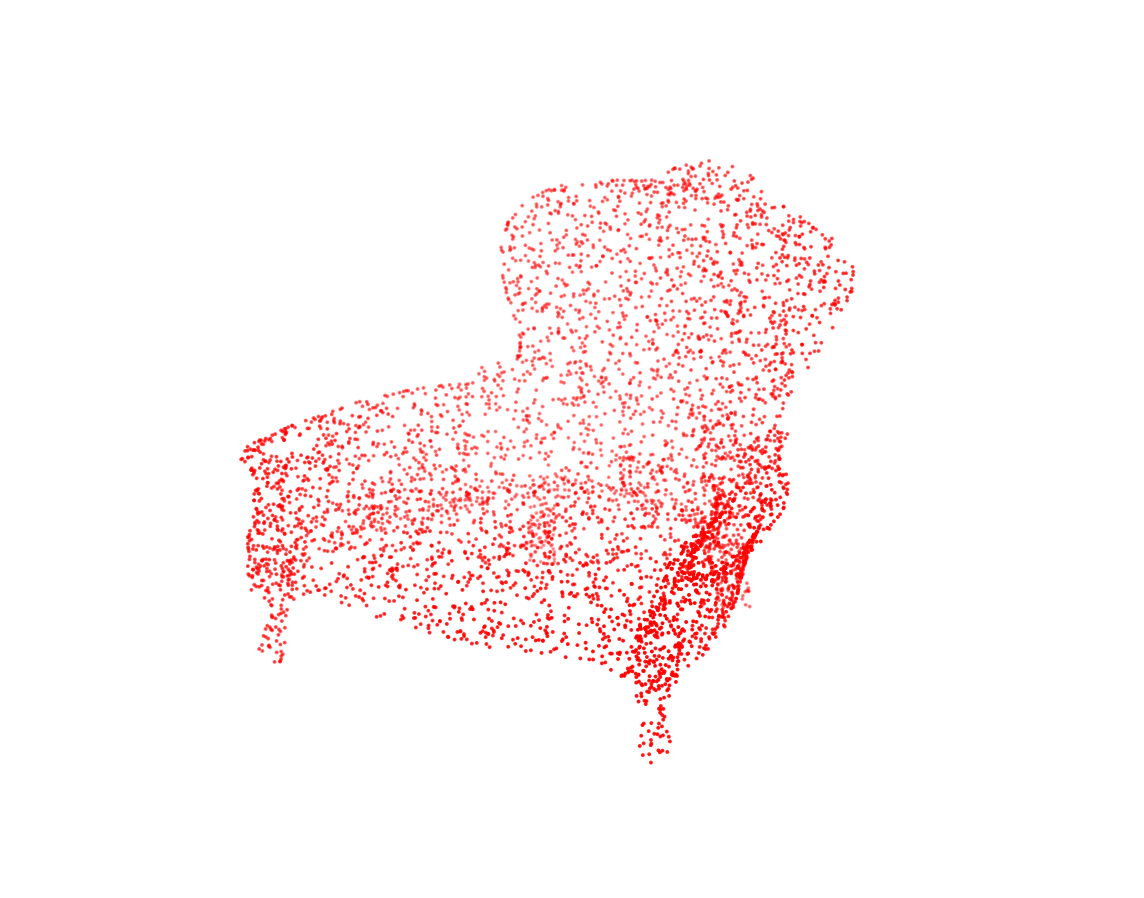

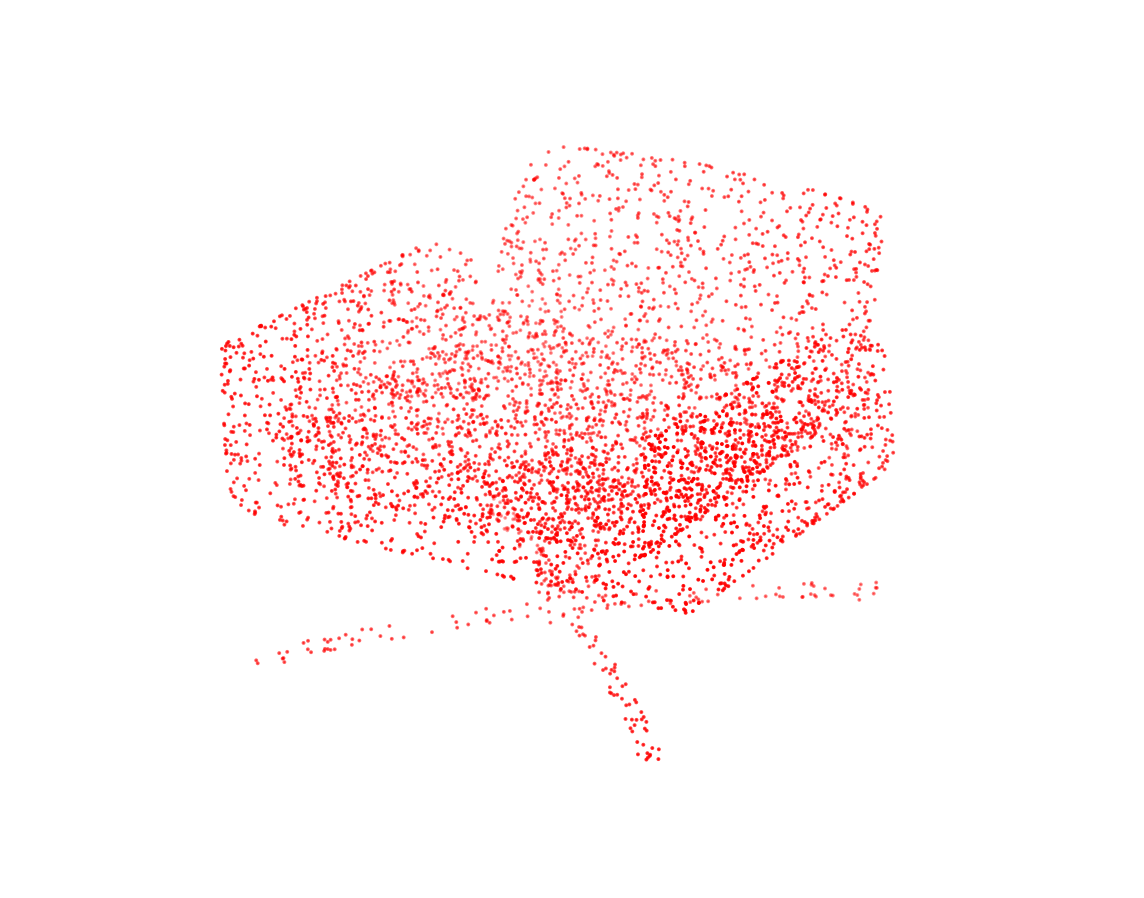

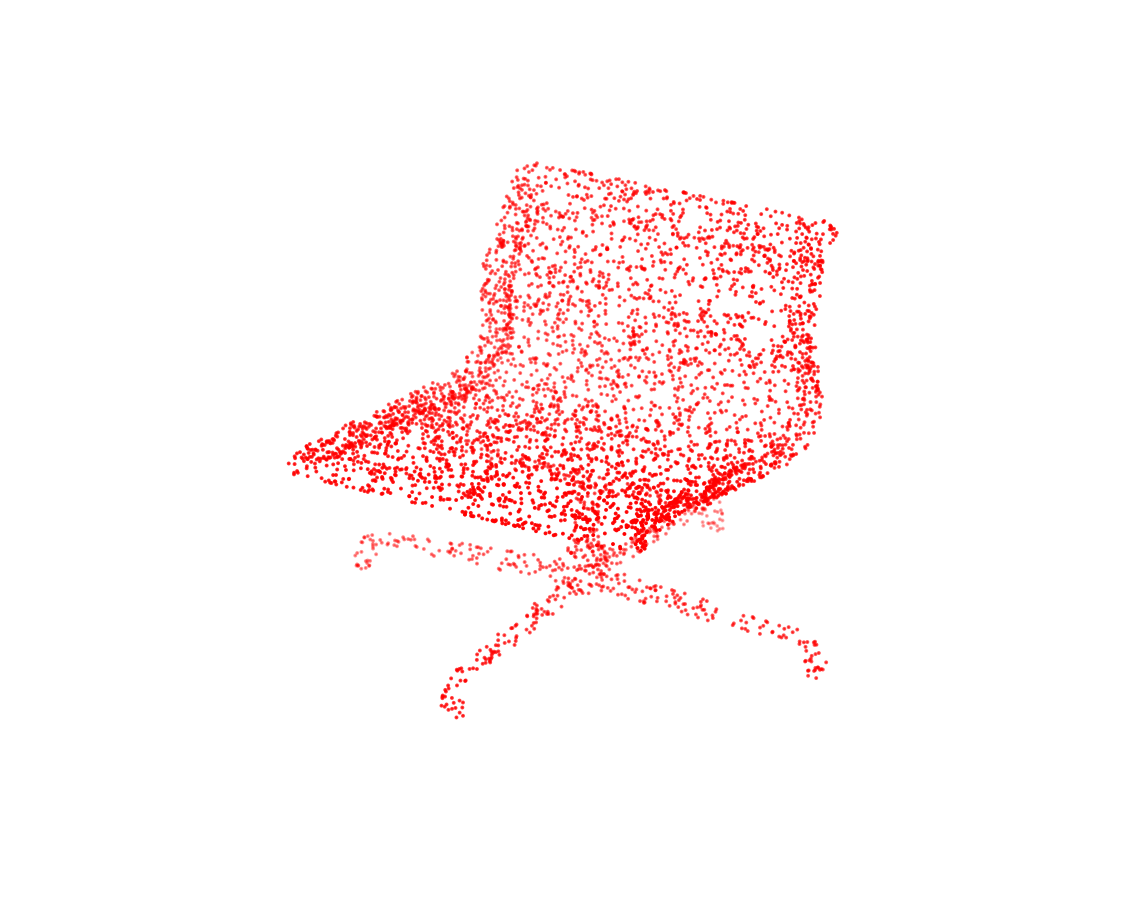

In [5]:
for i in range(10):
    visualize_npy(X_train[i], save_img_fpath=None)

4
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 0. batch_idx: 100
Loss:  3308030.2970465086 2185650.956565857
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 1. batch_idx: 100
Loss:  4096871.9024172975 1396163.0981048583
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 2. batch_idx: 100
Loss:  3439494.6757174684 1066224.052253113
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 3. batch_idx: 100
Loss:  1811416.3088858032 897891.2471110534
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 4. batch_idx: 100
Loss:  1908107.501124115 559185.6686972046
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 5. batch_idx: 100
Loss:  2033274.3451603698 875472.944508667


/home/mmvc/mmvc-ad-teachnas/ML_2020_Spring/sms1198/ml_autodecoder_ensemble_net_for_3D_objects/src/utils.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 8))


torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 6. batch_idx: 100
Loss:  2946945.87894989 774403.7777018738
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 7. batch_idx: 100
Loss:  2032051.0155265045 836855.0852635193
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 8. batch_idx: 100
Loss:  2013046.4003726197 875271.2658978271
torch.Size([1667, 3]) torch.Size([1667, 3]) torch.Size([1667, 3])
Epoch: 9. batch_idx: 100
Loss:  2157509.7858546446 727139.7927682495


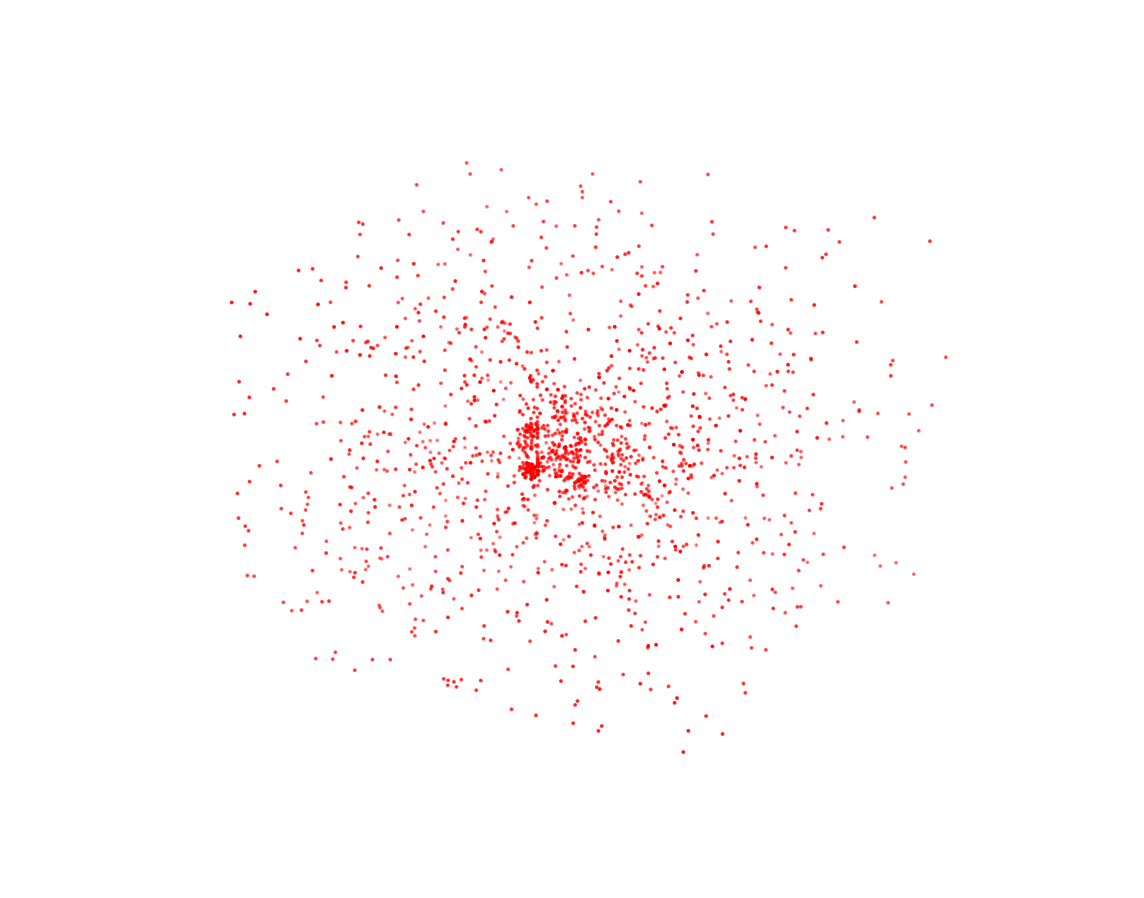

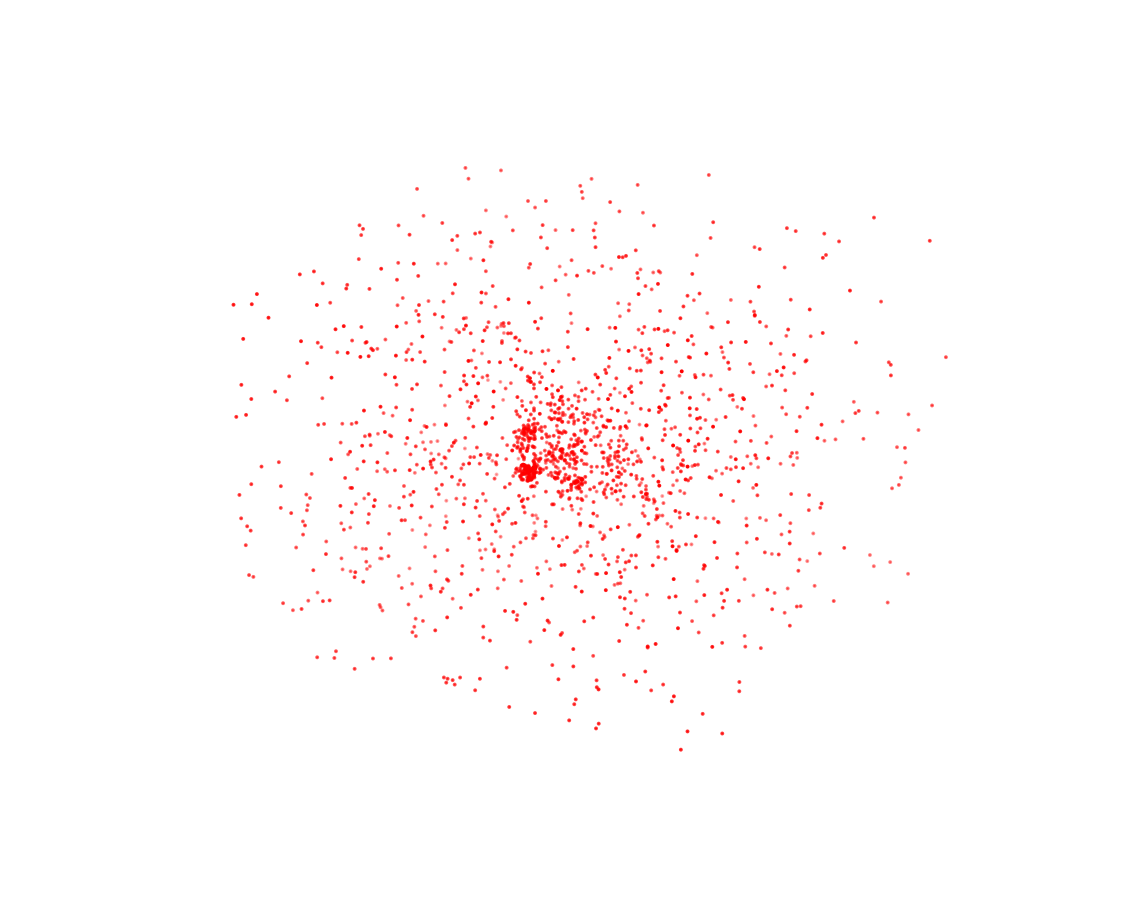

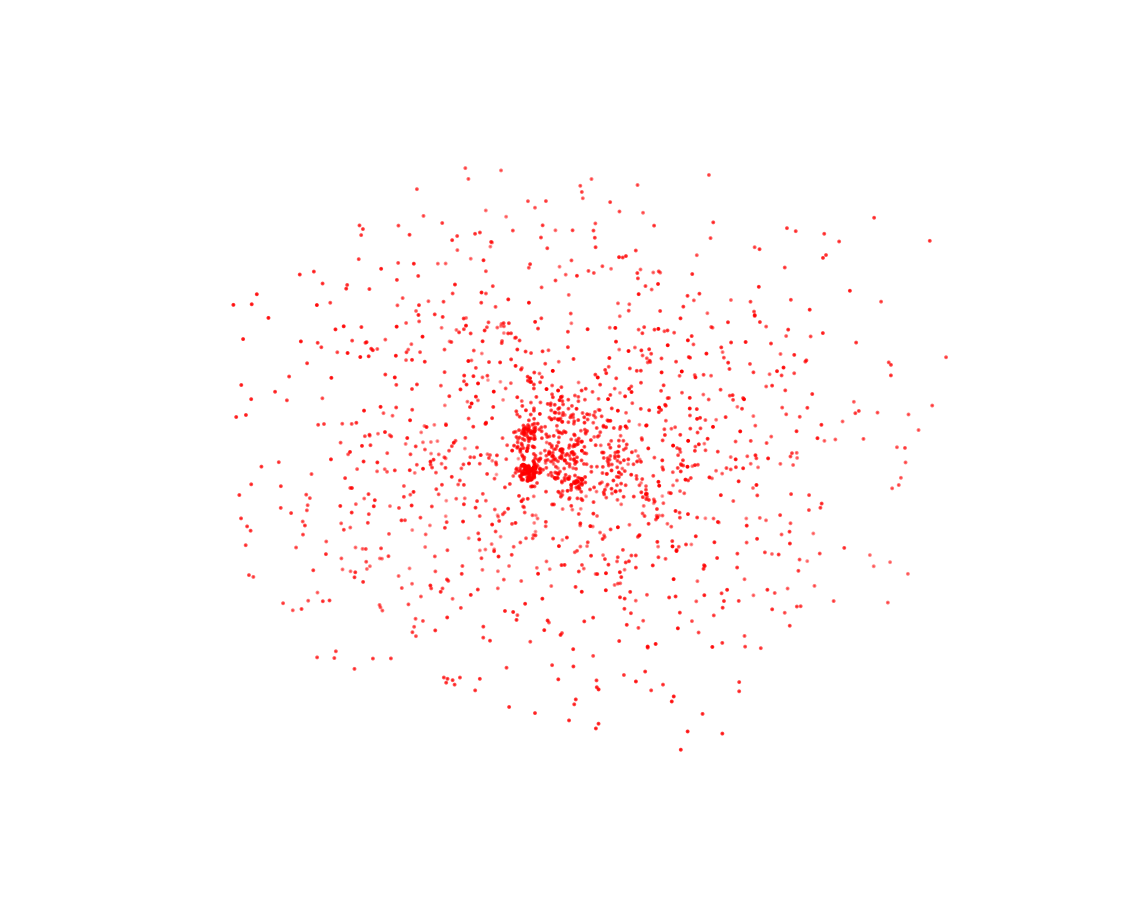

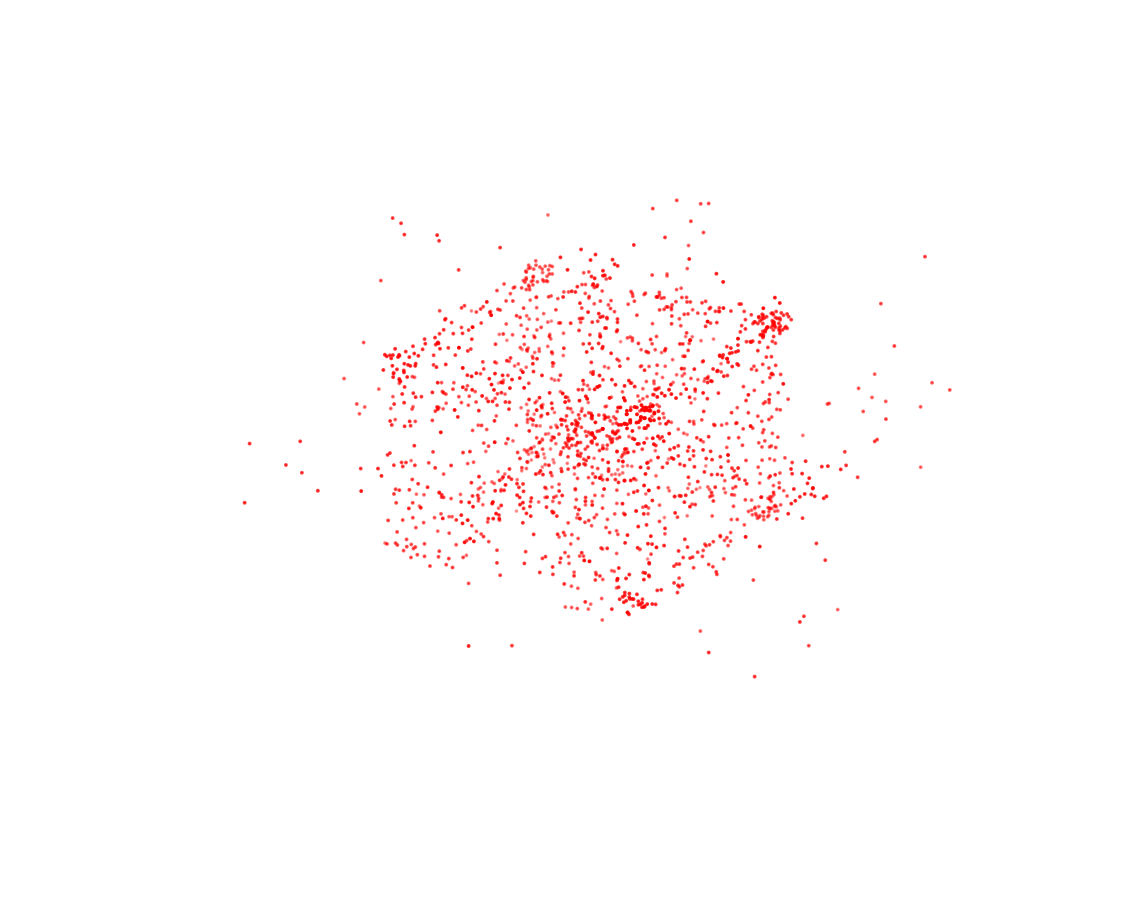

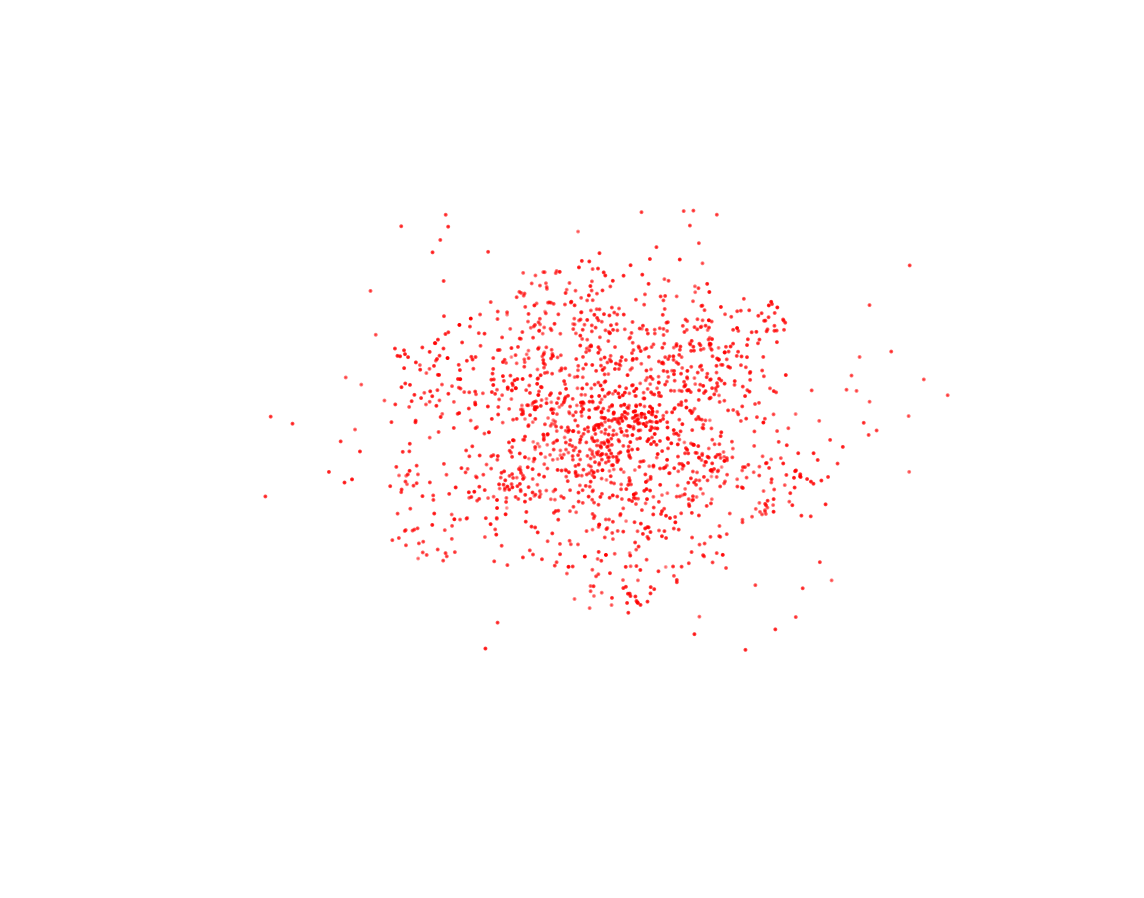

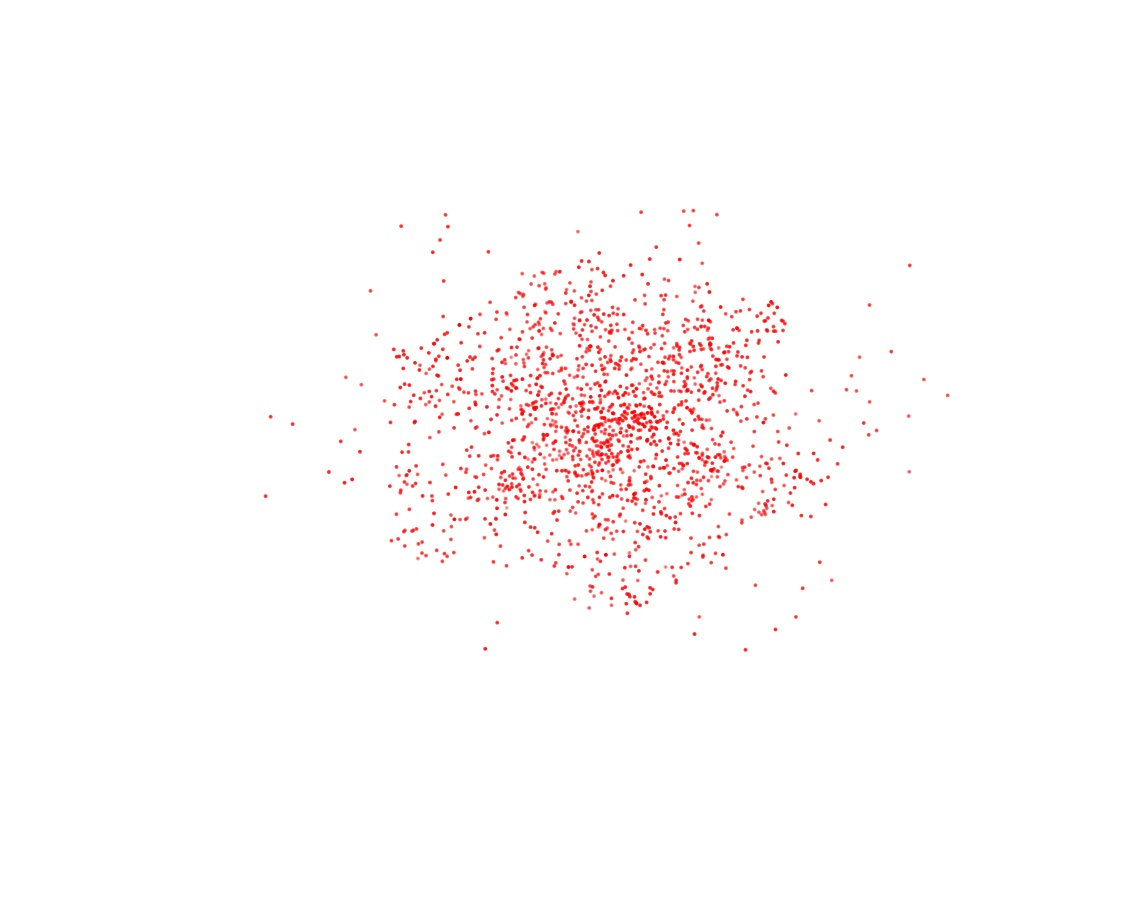

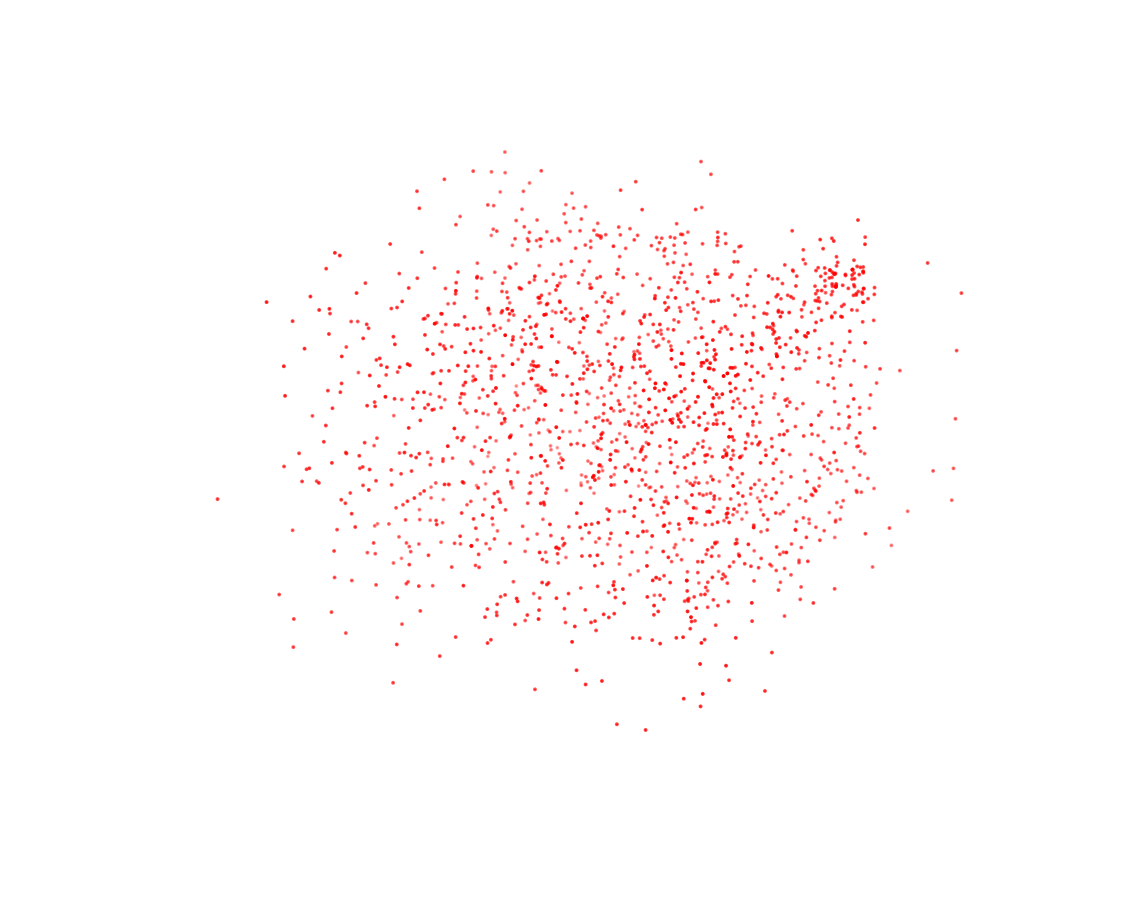

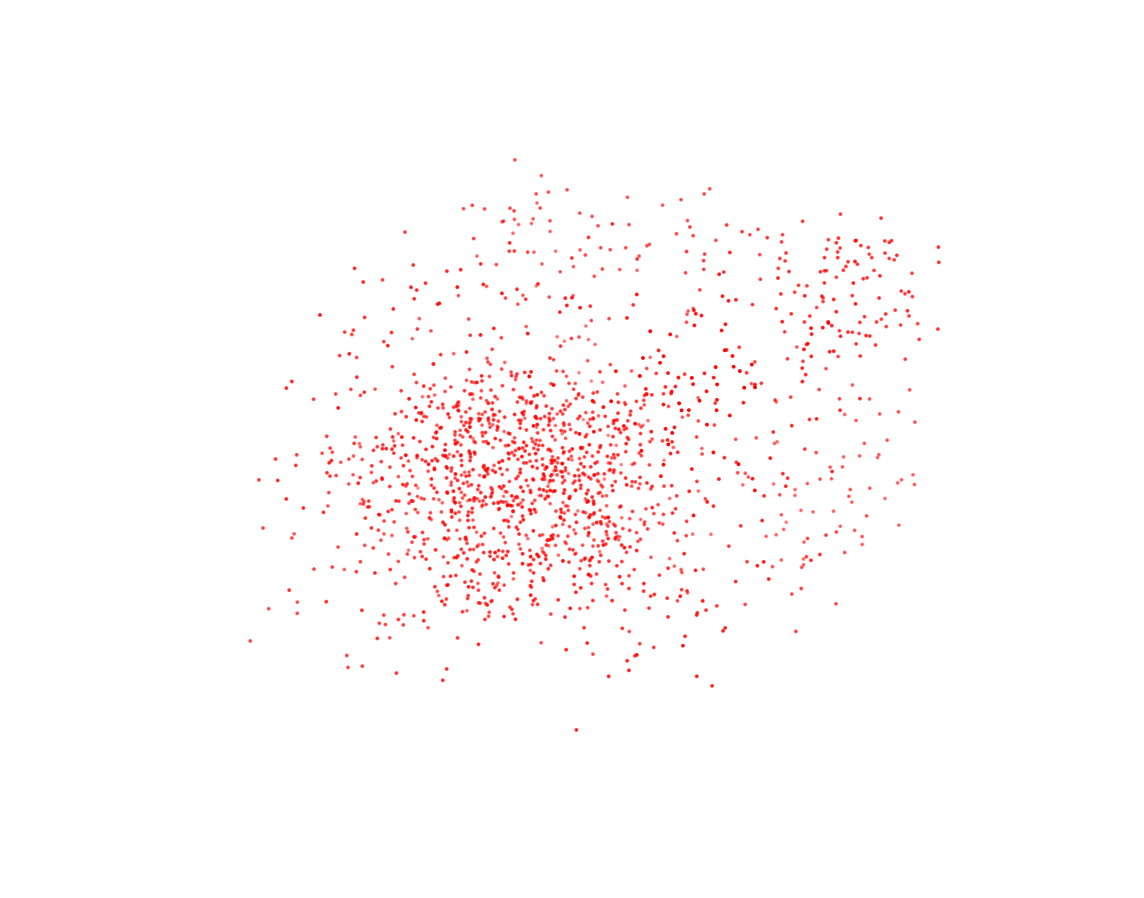

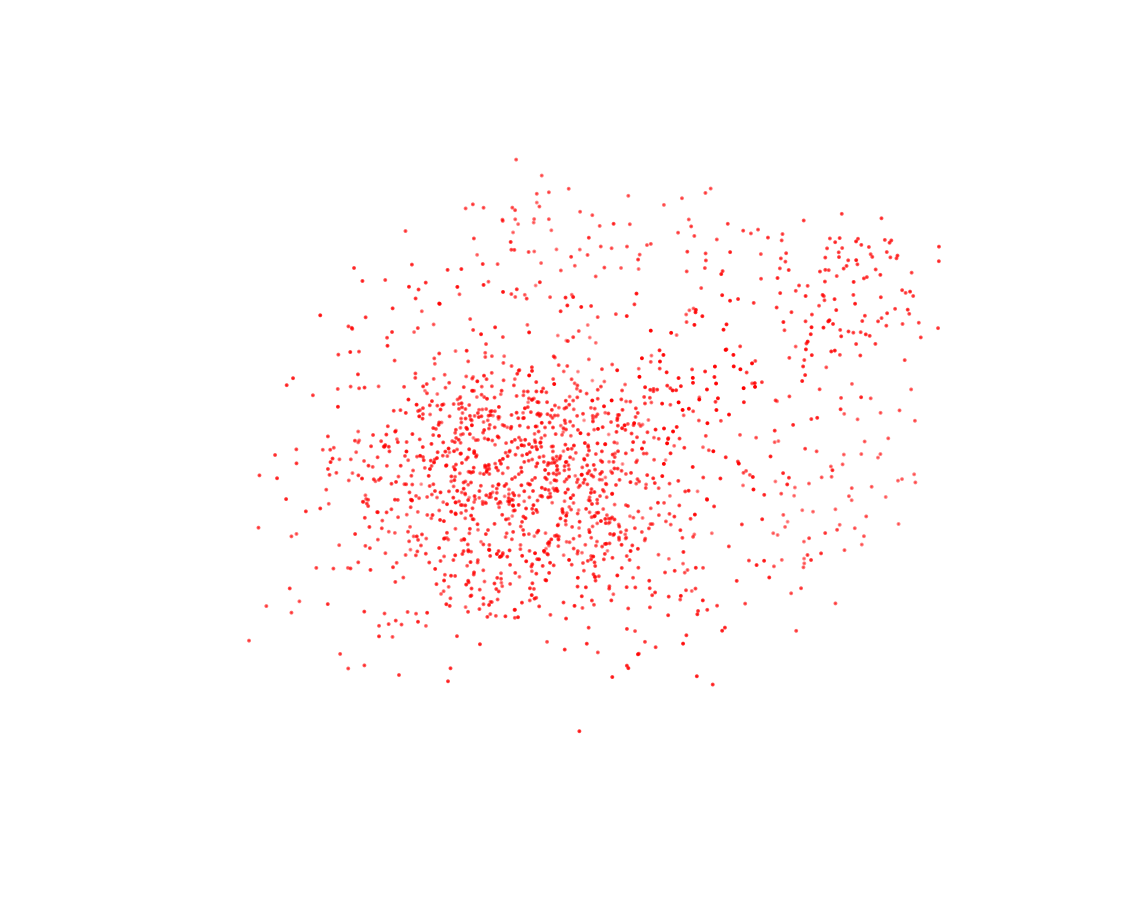

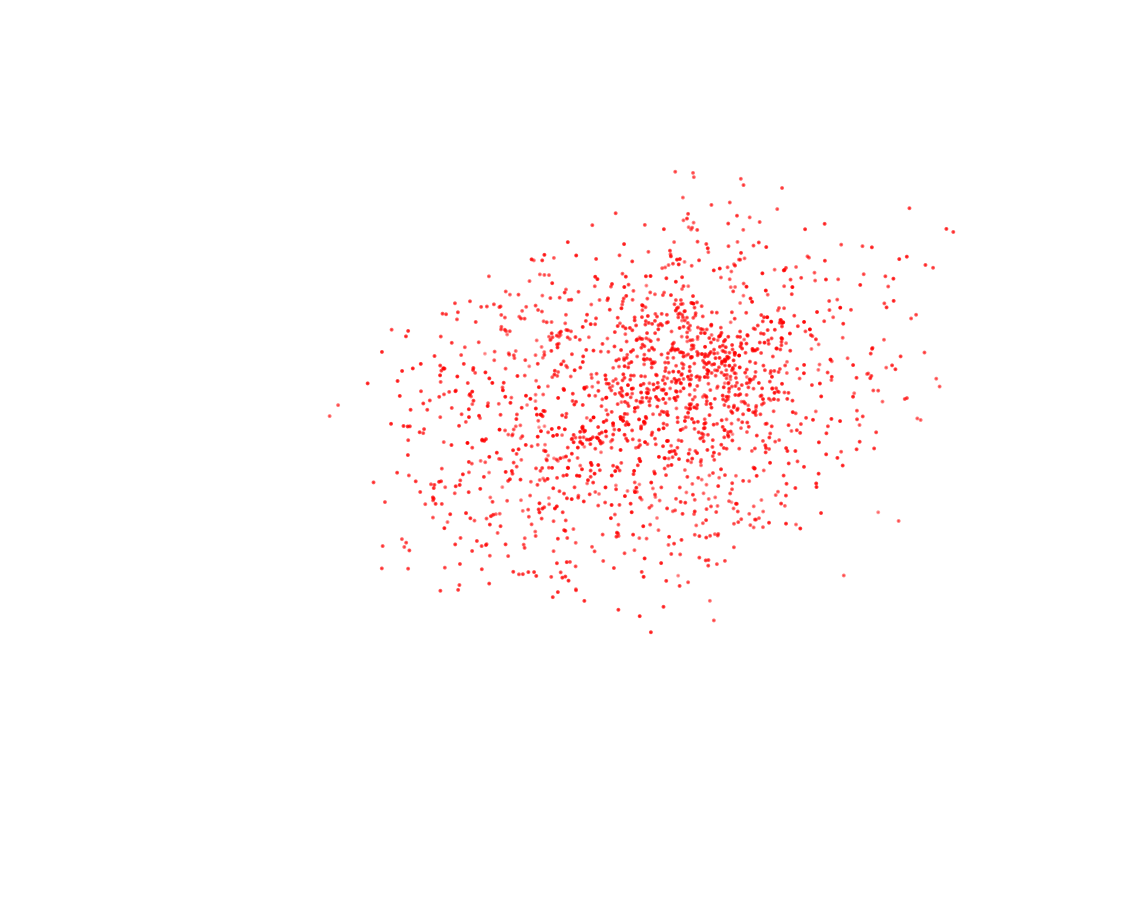

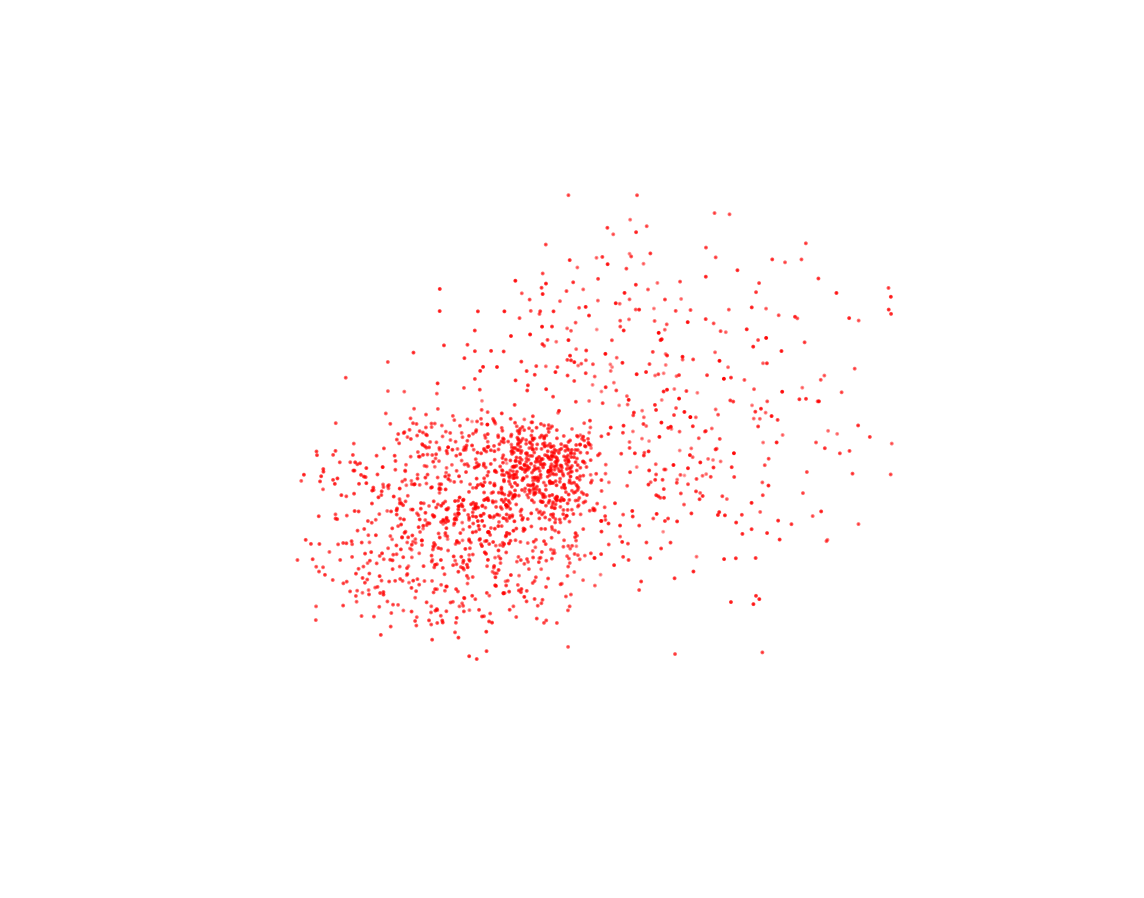

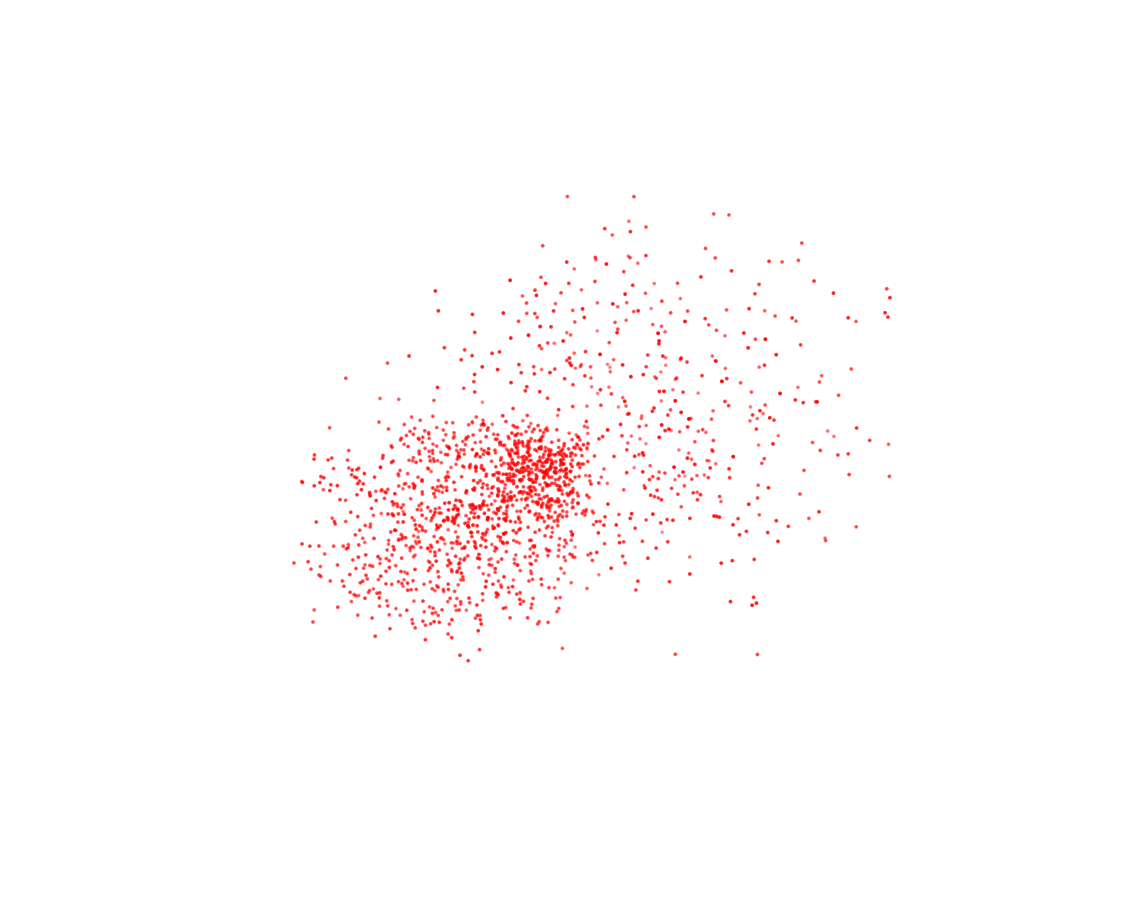

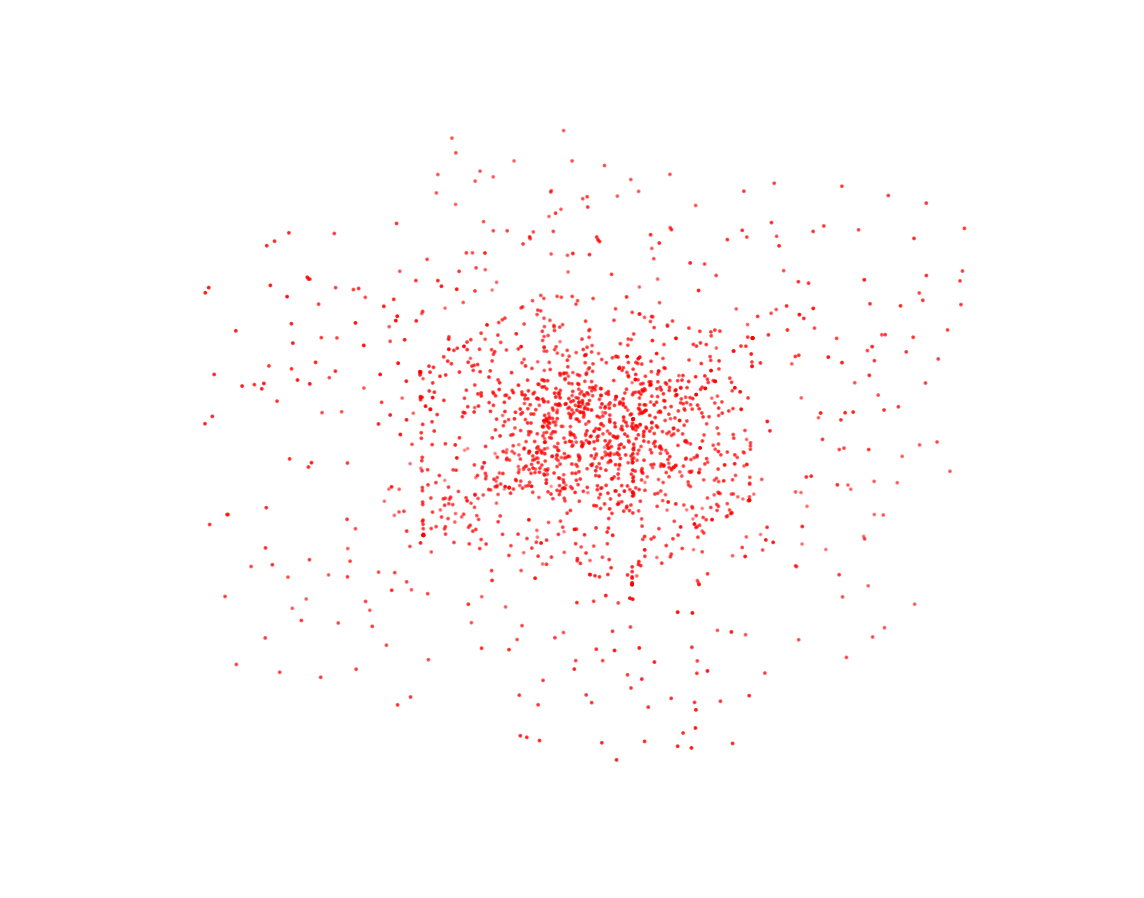

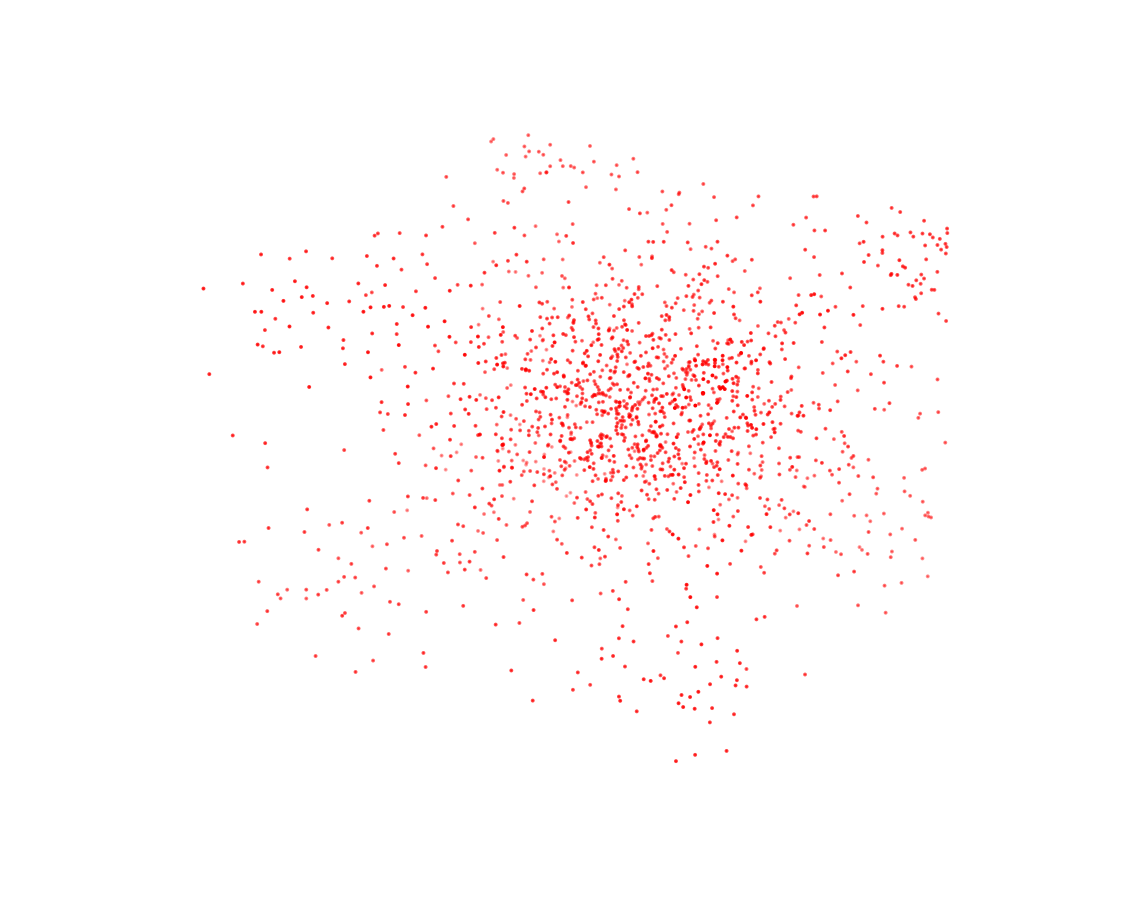

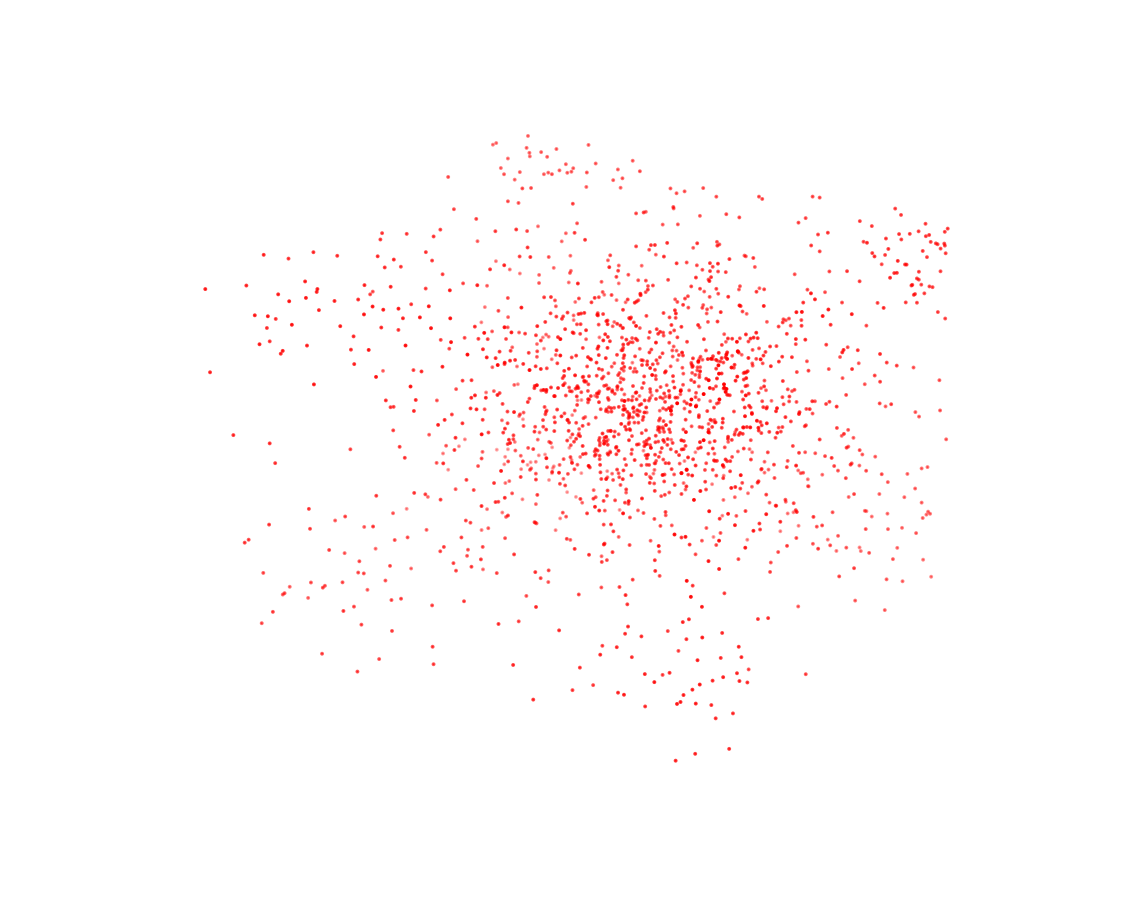

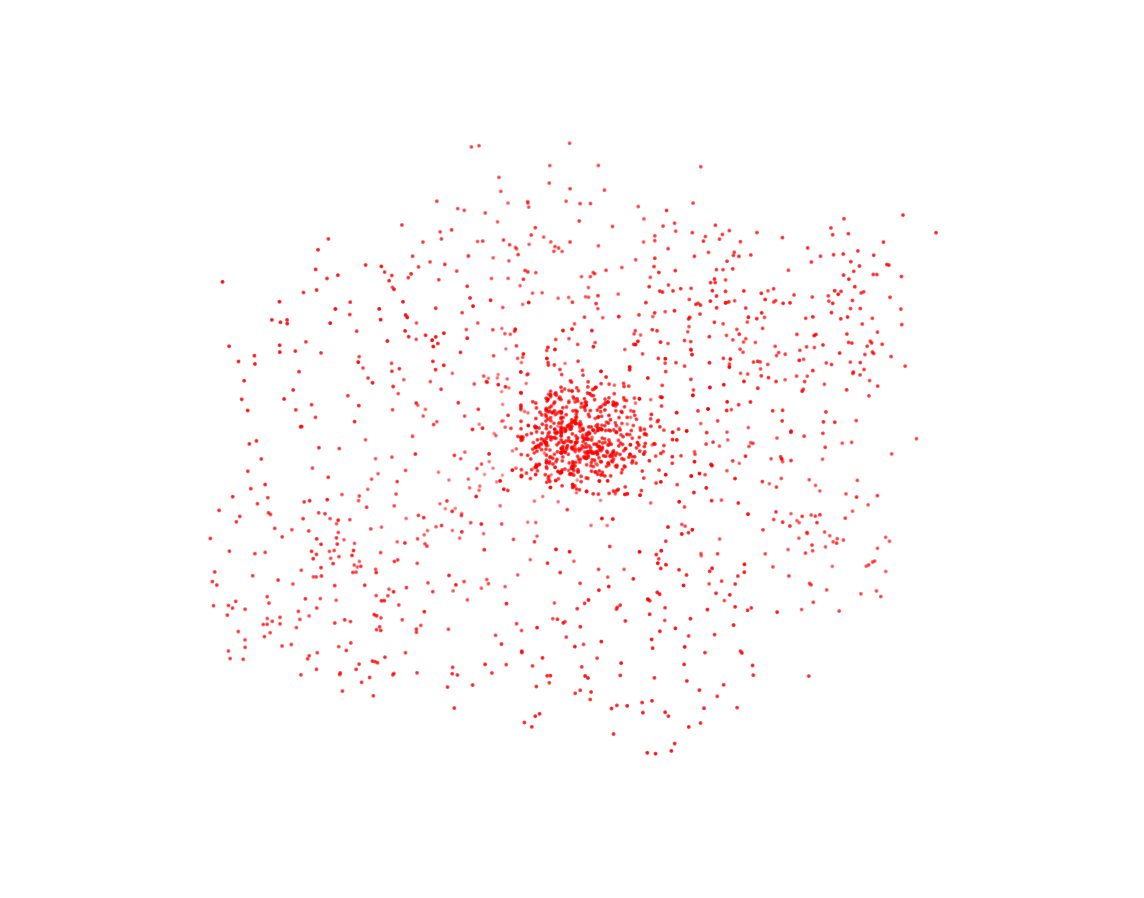

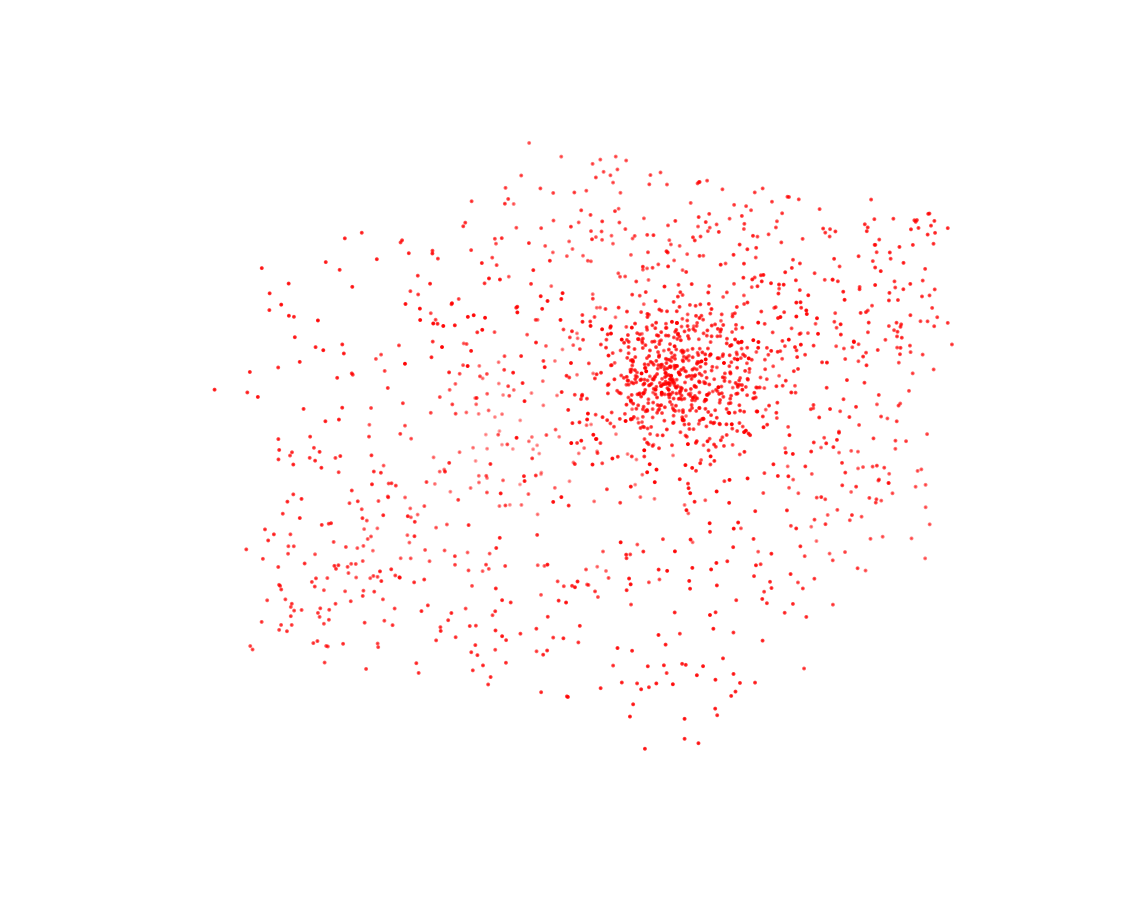

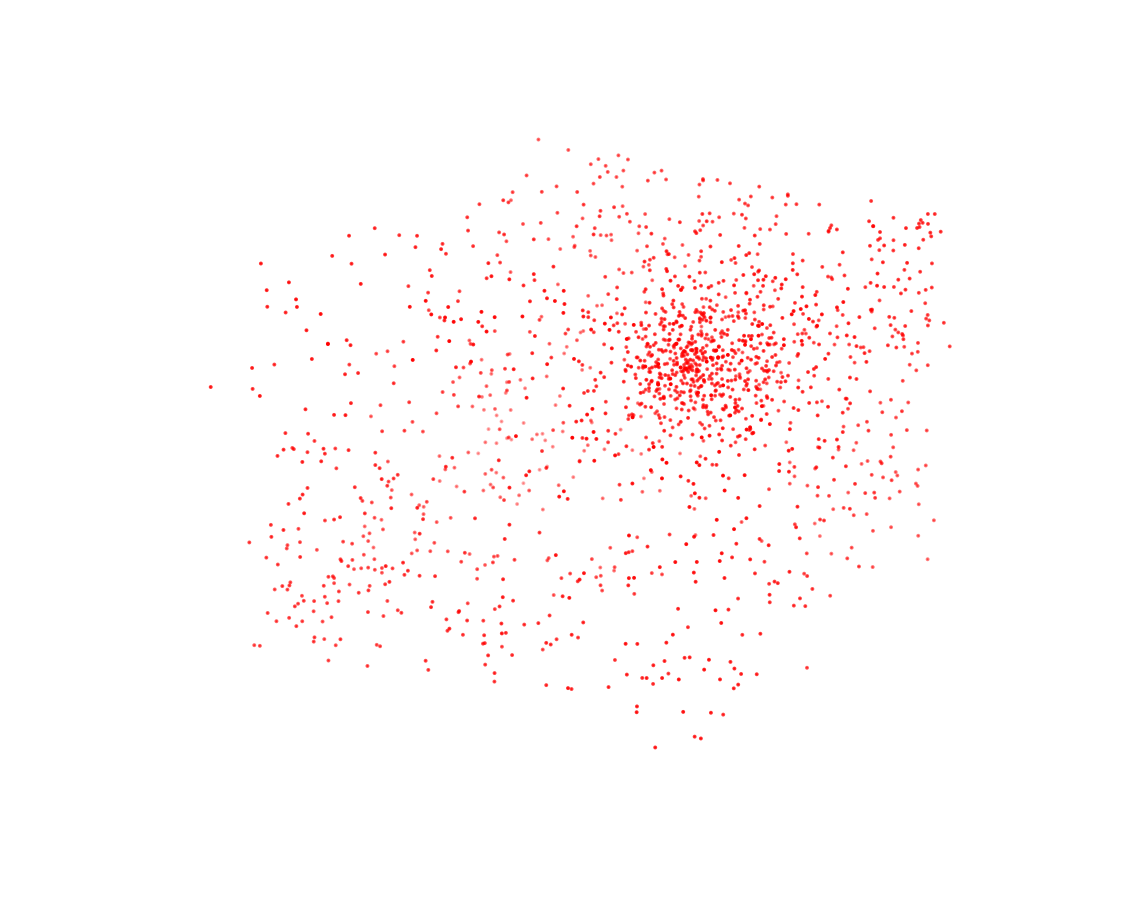

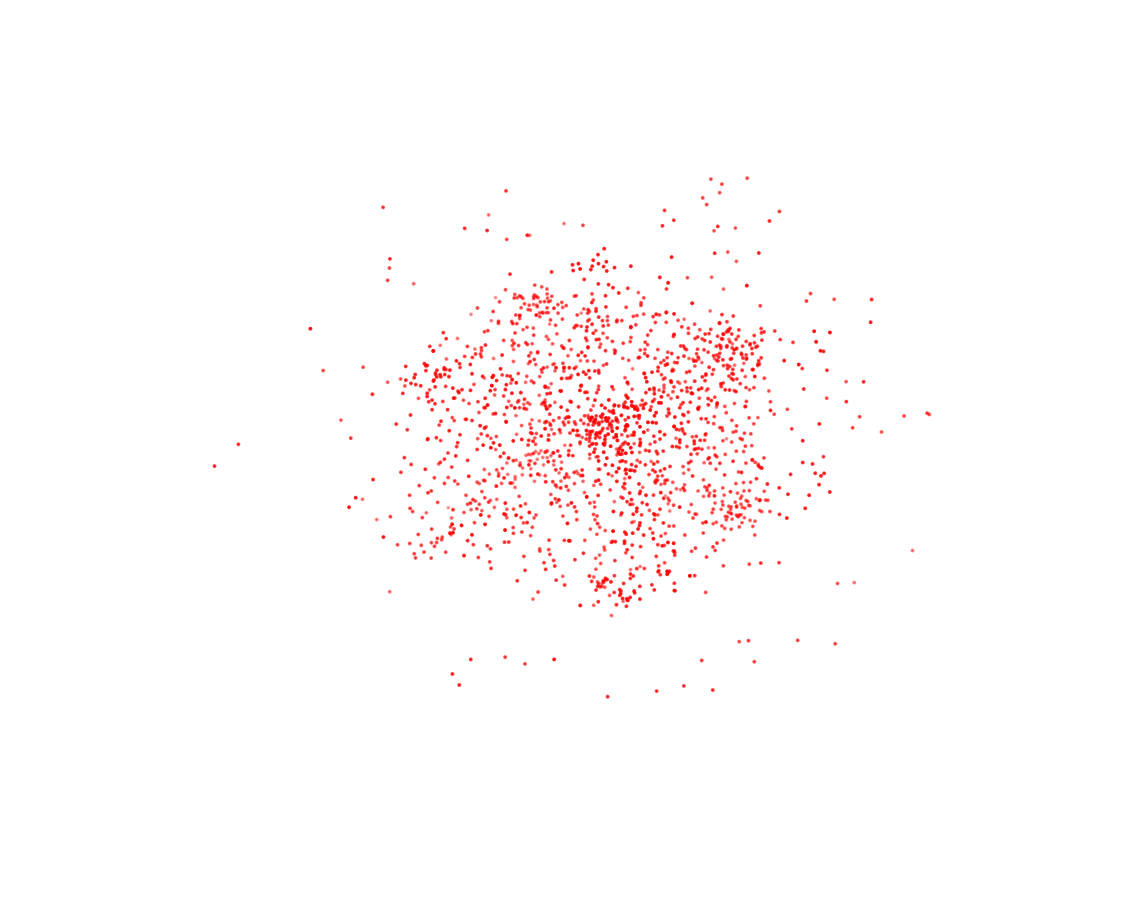

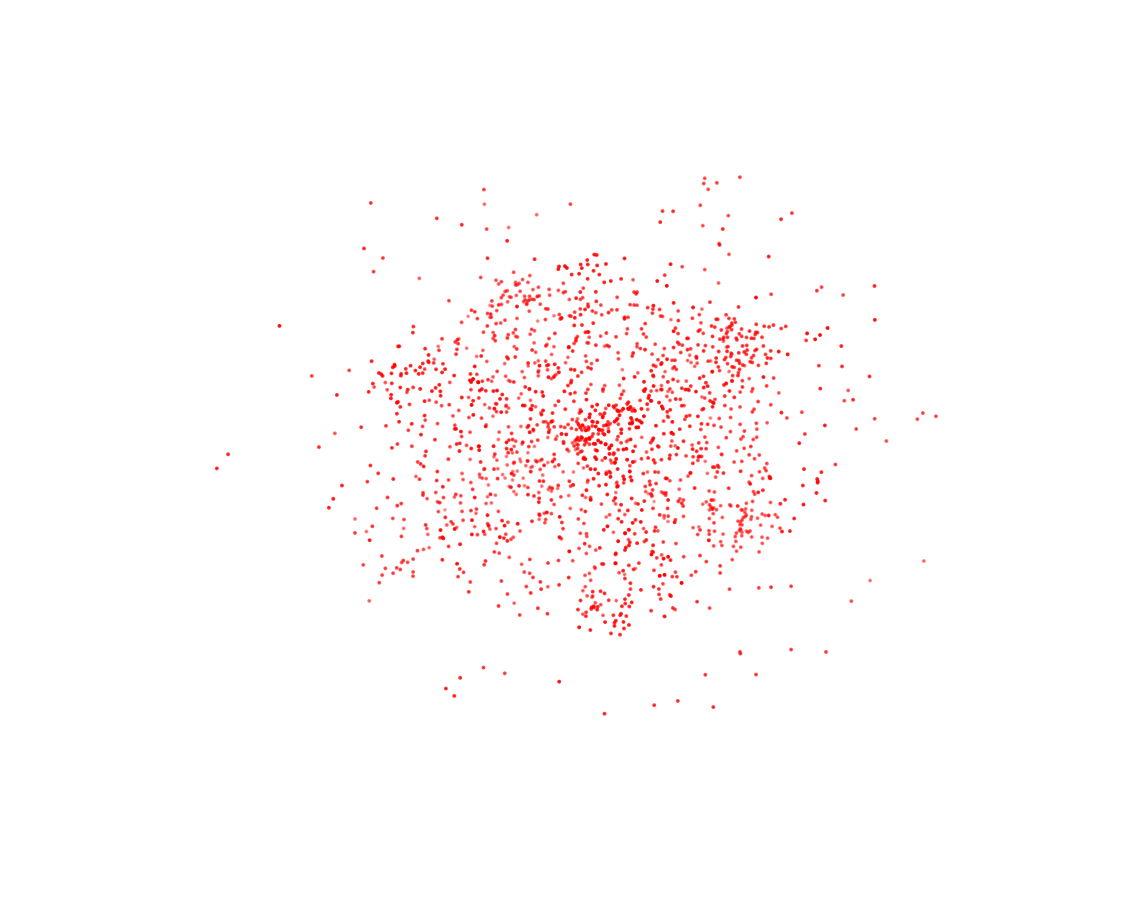

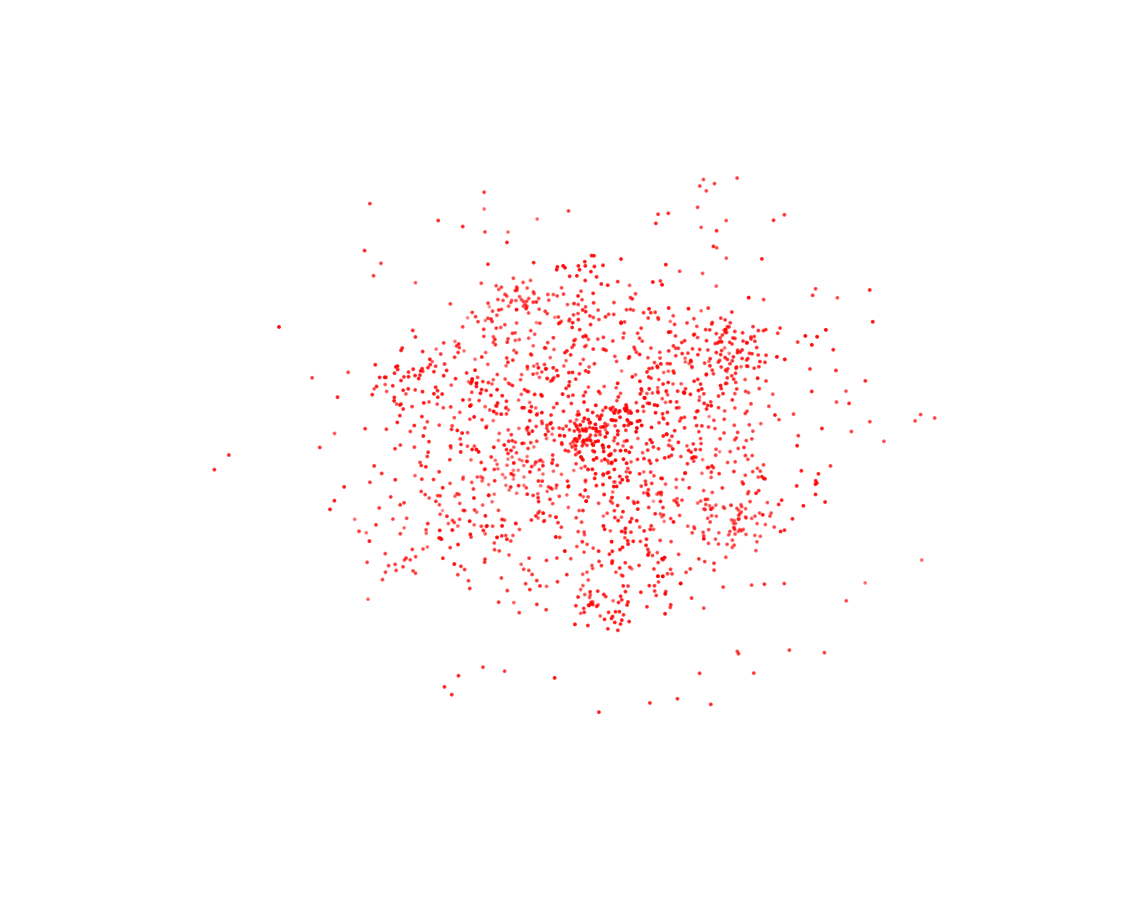

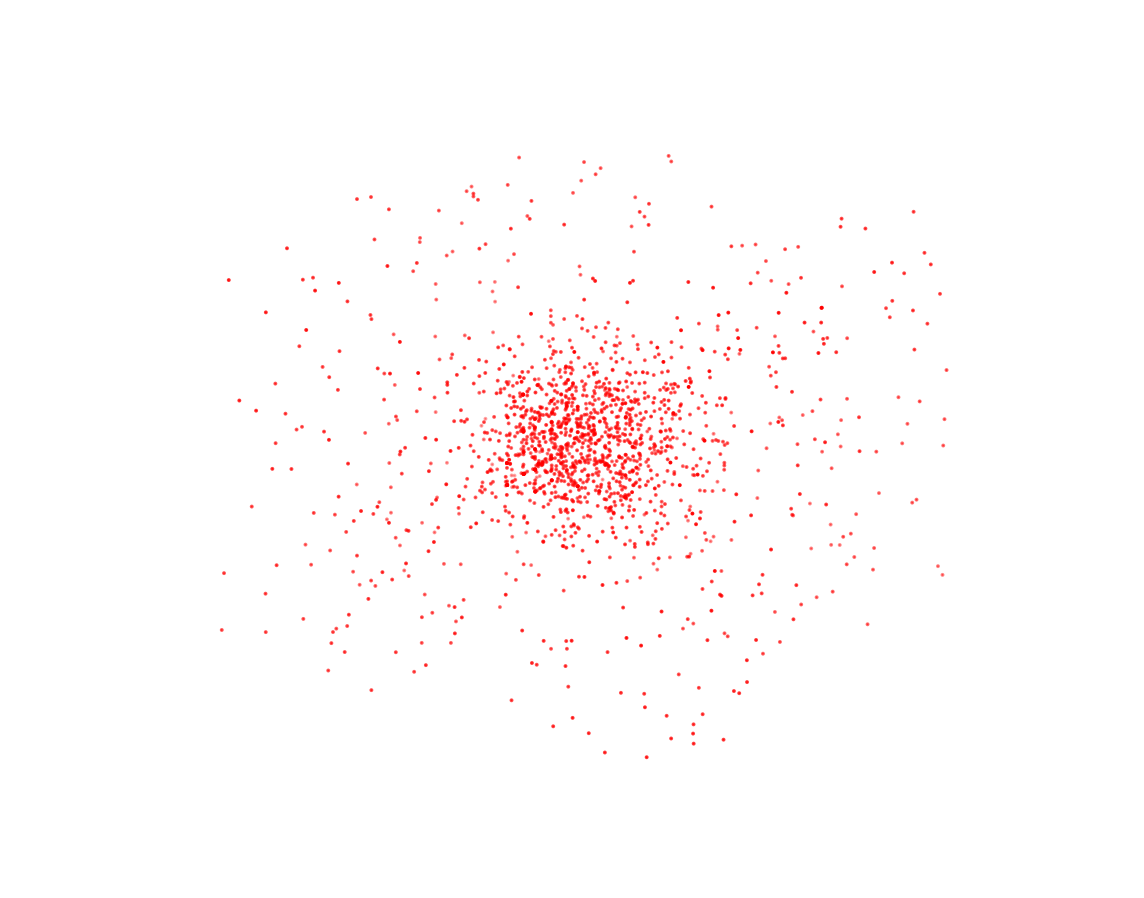

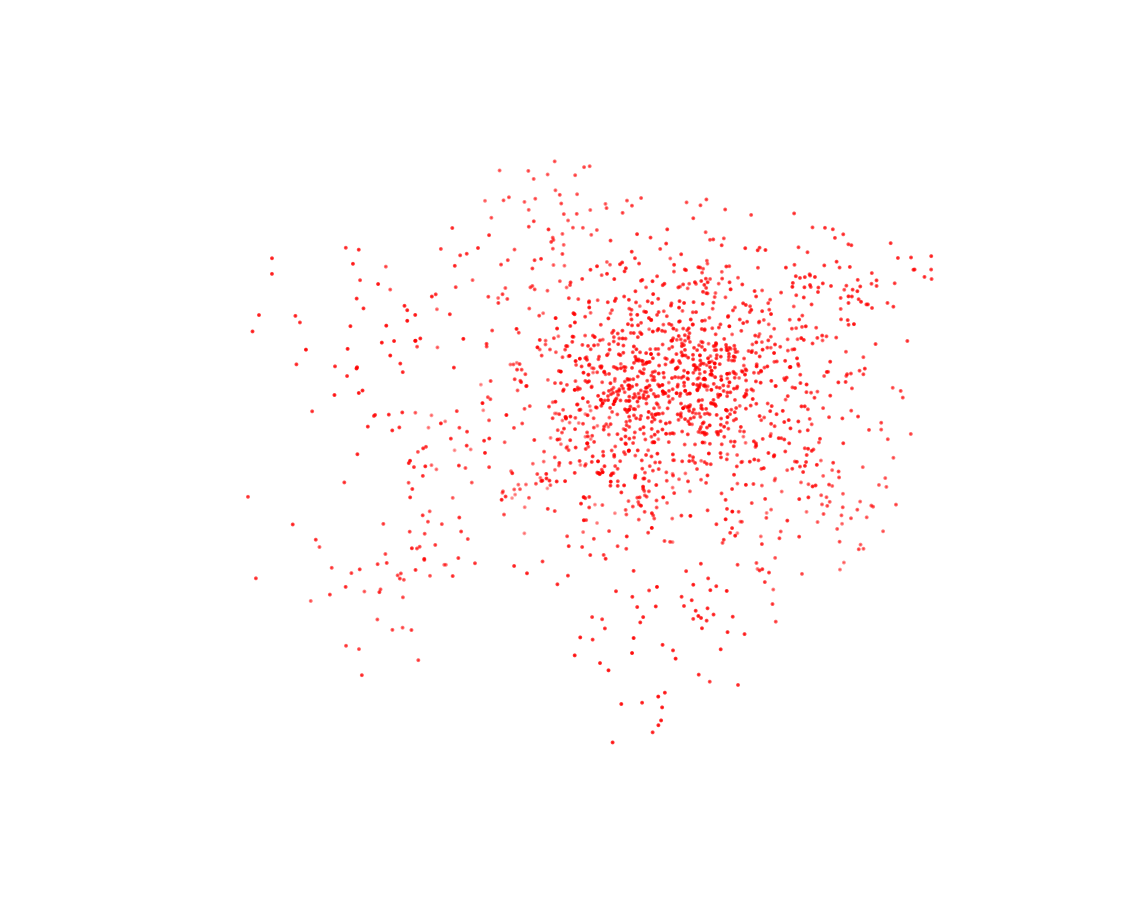

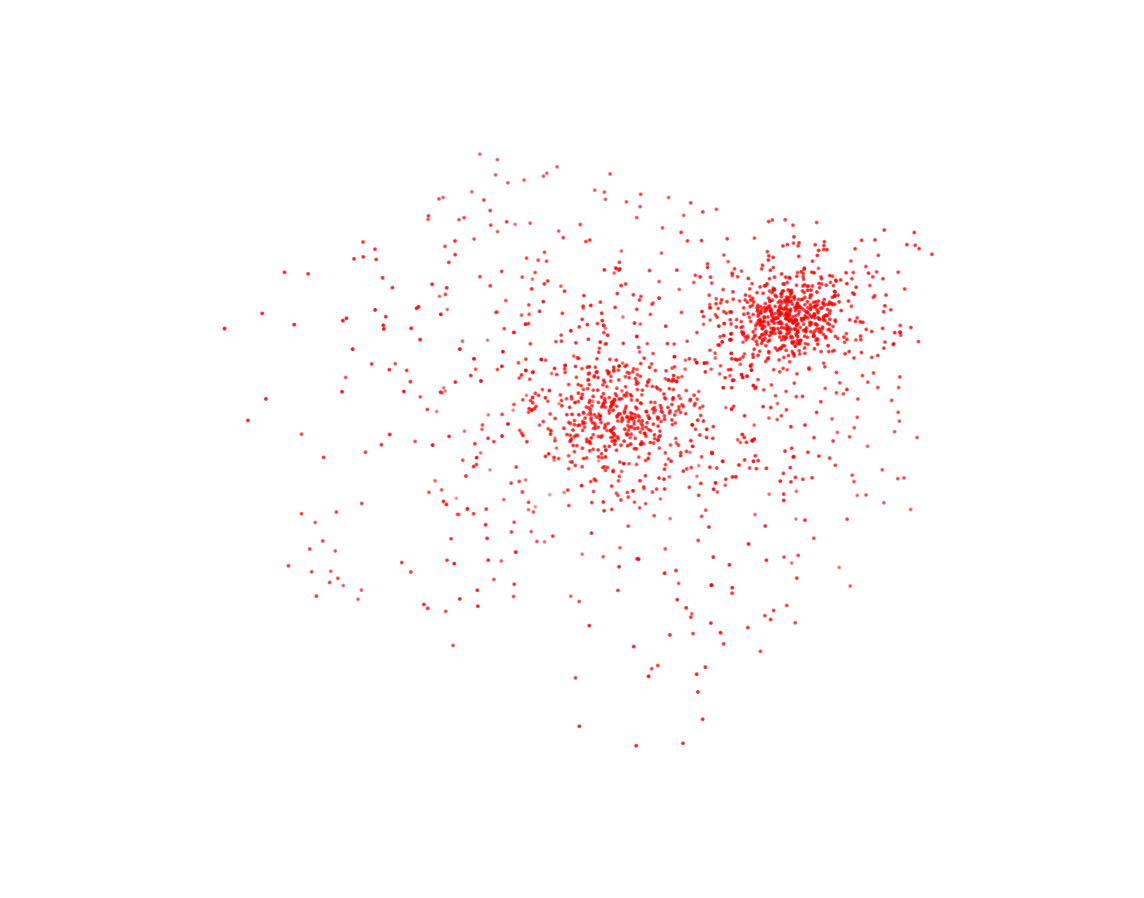

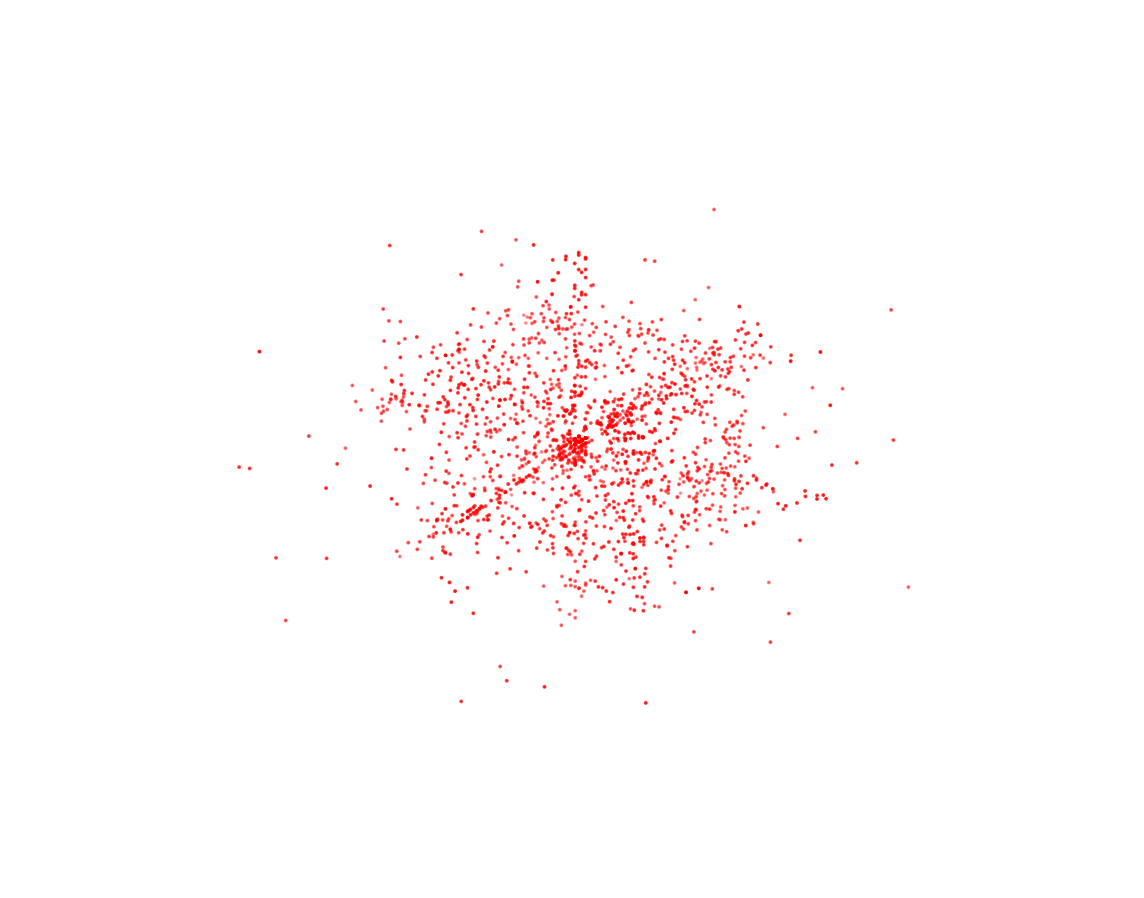

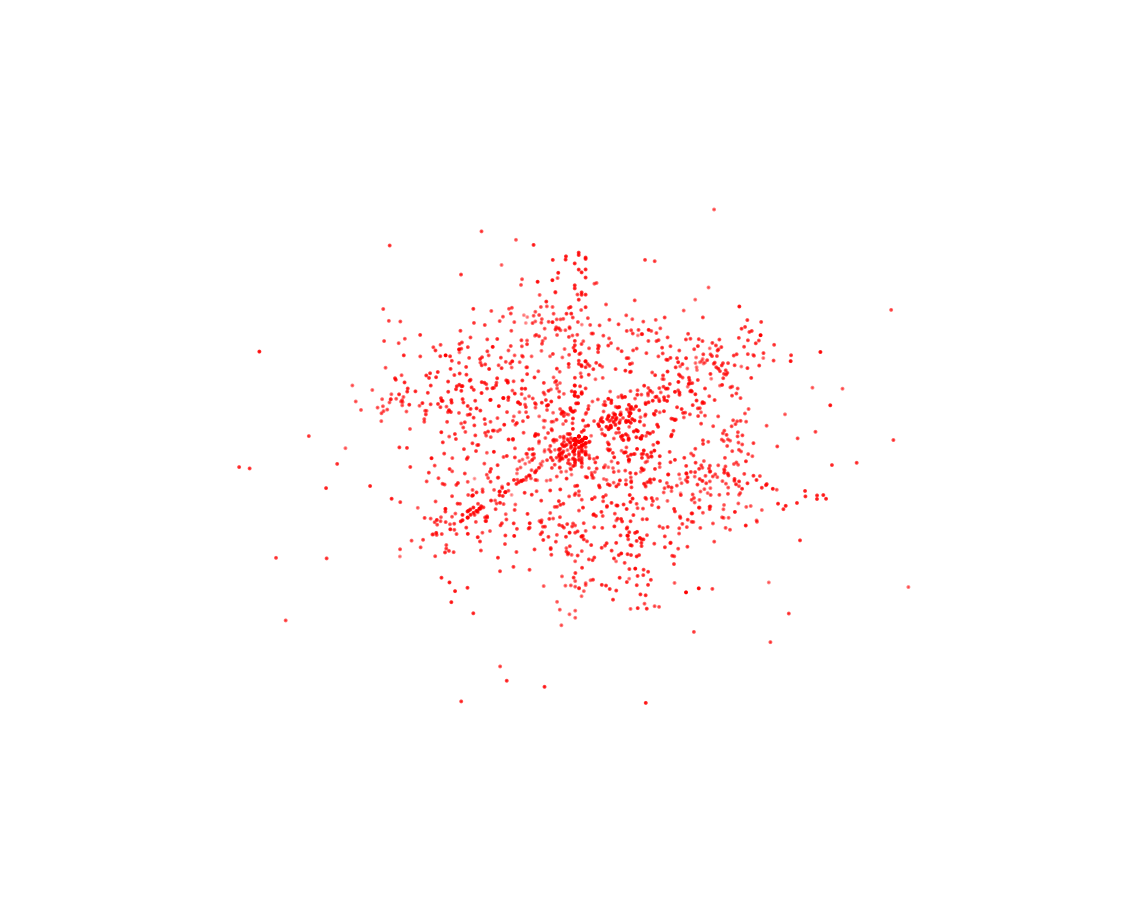

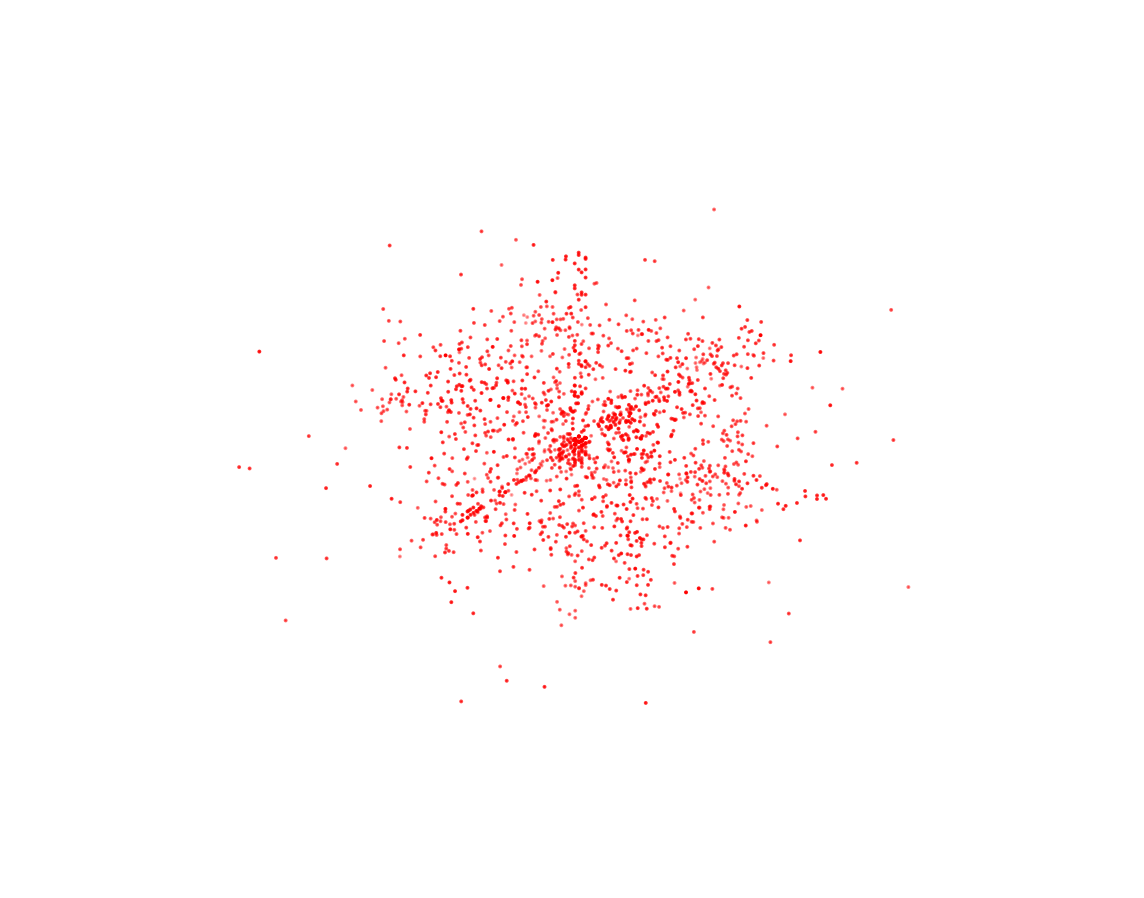

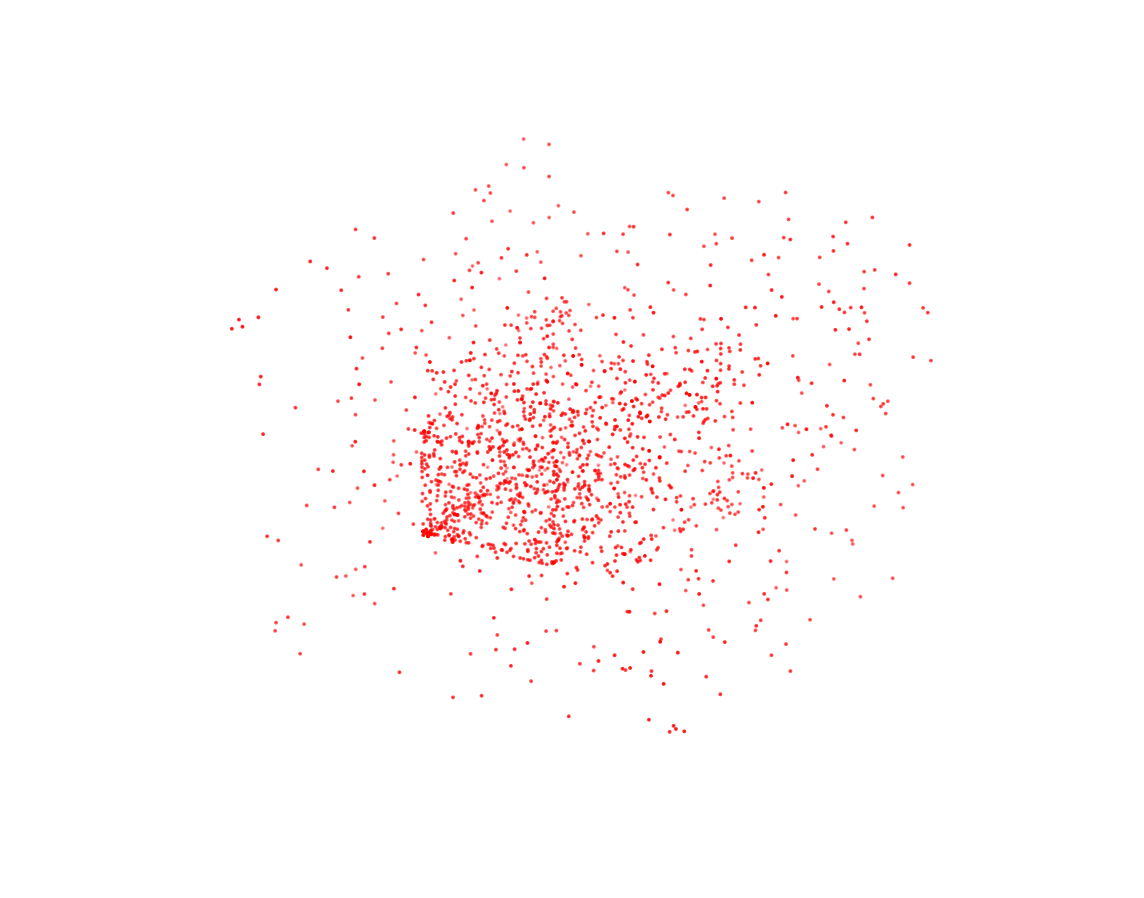

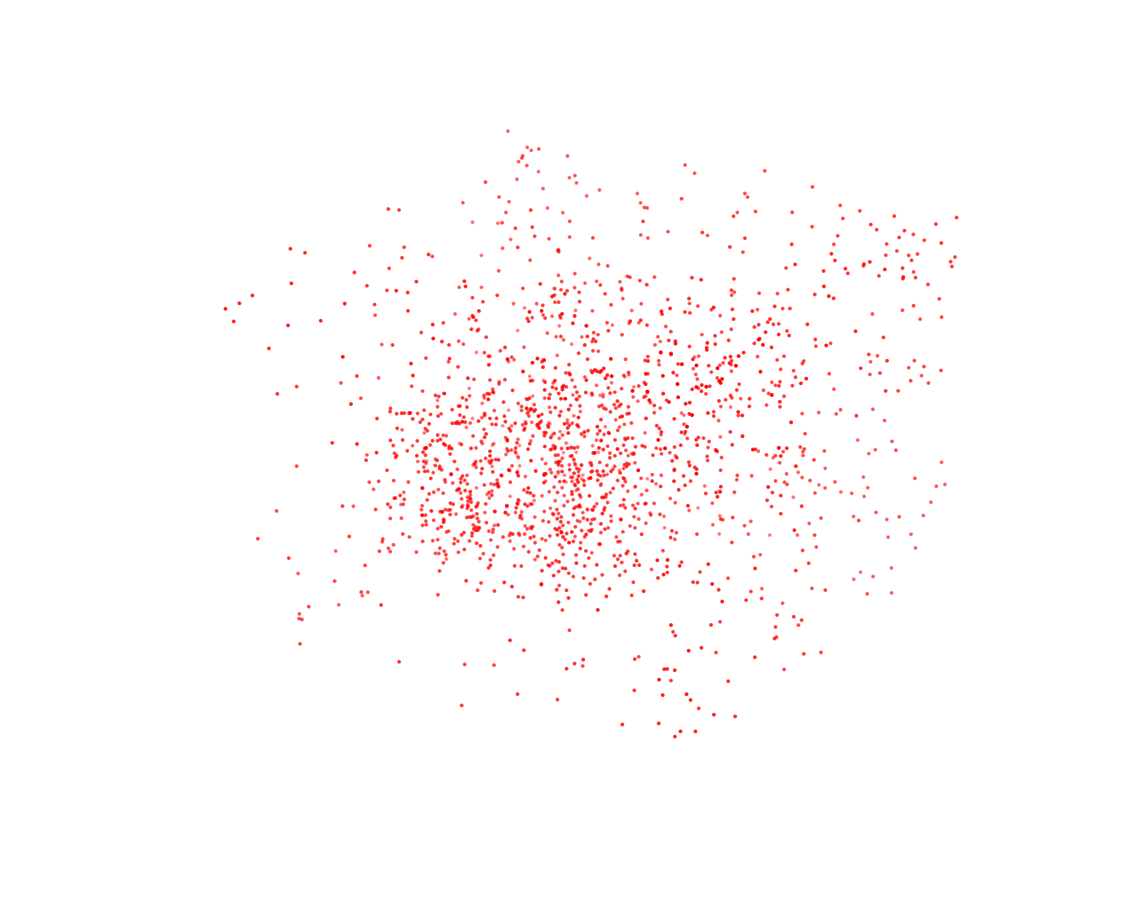

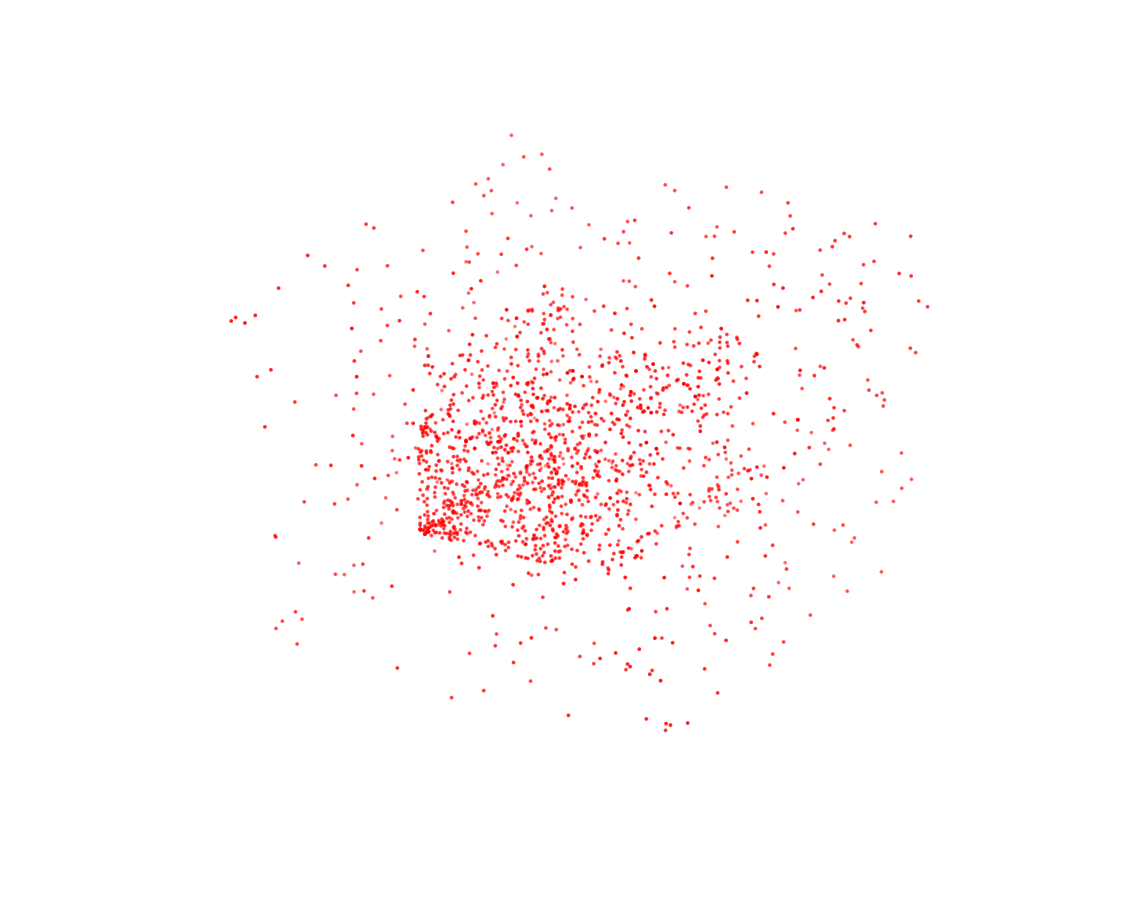

In [50]:
adnet_HP = HyperParameter(lr=0.001, epochs=4)
train_ds = PointDriftDS(X_train, y_train)
test_ds = PointDriftDS(X_test, y_test)

# train autodecoder
mn_autodecoder = train_decoder(adnet_HP, DS,
                               train_ds=train_ds,
                               save_wt_fname='mnet_decoder.pth')

In [33]:
# get the train encodings
train_encoding_ds = EncodingDS(PointDriftDS(
    X_train, y_train), mn_autodecoder)
train_result = train_encoding_ds.train_encodings(find_encoding, num_iterations=15, lr=0.05)

# get the test encodings
test_encoding_ds = EncodingDS(PointDriftDS(
    X_test, y_test), mn_autodecoder)
test_result = test_encoding_ds.train_encodings(find_encoding, num_iterations=15, lr=0.05)

0 1185.632 tensor(5.1140, device='cuda:0', grad_fn=<NormBackward0>)
0 511.65433 tensor(5.1900, device='cuda:0', grad_fn=<NormBackward0>)
0 3015.1802 tensor(5.0841, device='cuda:0', grad_fn=<NormBackward0>)
0 1563.0435 tensor(5.0213, device='cuda:0', grad_fn=<NormBackward0>)
0 60191.605 tensor(5.1390, device='cuda:0', grad_fn=<NormBackward0>)
0 60146.473 tensor(5.1314, device='cuda:0', grad_fn=<NormBackward0>)
0 1052.3042 tensor(5.1346, device='cuda:0', grad_fn=<NormBackward0>)
0 49868748.0 tensor(5.2216, device='cuda:0', grad_fn=<NormBackward0>)
0 2335.3438 tensor(5.0993, device='cuda:0', grad_fn=<NormBackward0>)
0 2785.3743 tensor(5.0538, device='cuda:0', grad_fn=<NormBackward0>)
0 1170.7025 tensor(5.1558, device='cuda:0', grad_fn=<NormBackward0>)
0 2214.78 tensor(5.1506, device='cuda:0', grad_fn=<NormBackward0>)
0 472.07077 tensor(5.0309, device='cuda:0', grad_fn=<NormBackward0>)
0 488.24692 tensor(5.1745, device='cuda:0', grad_fn=<NormBackward0>)
0 1244.1318 tensor(5.0712, device='c

0 841.43475 tensor(5.1442, device='cuda:0', grad_fn=<NormBackward0>)
0 659.51953 tensor(5.2084, device='cuda:0', grad_fn=<NormBackward0>)
0 6381.3315 tensor(5.1288, device='cuda:0', grad_fn=<NormBackward0>)
0 854.5192 tensor(5.1953, device='cuda:0', grad_fn=<NormBackward0>)
0 38374.832 tensor(5.0937, device='cuda:0', grad_fn=<NormBackward0>)
0 2390.779 tensor(5.1236, device='cuda:0', grad_fn=<NormBackward0>)
0 1934.0944 tensor(5.1196, device='cuda:0', grad_fn=<NormBackward0>)
0 259384.38 tensor(4.9868, device='cuda:0', grad_fn=<NormBackward0>)
0 3789.6716 tensor(5.0876, device='cuda:0', grad_fn=<NormBackward0>)
0 773.4883 tensor(5.1111, device='cuda:0', grad_fn=<NormBackward0>)
0 1183.9744 tensor(5.0755, device='cuda:0', grad_fn=<NormBackward0>)
0 4280819.0 tensor(5.1344, device='cuda:0', grad_fn=<NormBackward0>)
0 7010.9536 tensor(5.1742, device='cuda:0', grad_fn=<NormBackward0>)
0 963.59393 tensor(5.1920, device='cuda:0', grad_fn=<NormBackward0>)
0 277018.53 tensor(5.0105, device='cu

0 4291546.5 tensor(5.1759, device='cuda:0', grad_fn=<NormBackward0>)
0 118773.086 tensor(5.1245, device='cuda:0', grad_fn=<NormBackward0>)
0 266.09332 tensor(5.1827, device='cuda:0', grad_fn=<NormBackward0>)
0 461.77298 tensor(5.0966, device='cuda:0', grad_fn=<NormBackward0>)
0 3395.2385 tensor(5.1212, device='cuda:0', grad_fn=<NormBackward0>)
0 4281487.0 tensor(5.1258, device='cuda:0', grad_fn=<NormBackward0>)
0 11284.15 tensor(5.2022, device='cuda:0', grad_fn=<NormBackward0>)
0 222.49033 tensor(5.1423, device='cuda:0', grad_fn=<NormBackward0>)
0 31492.604 tensor(5.0905, device='cuda:0', grad_fn=<NormBackward0>)
0 841.8653 tensor(5.1486, device='cuda:0', grad_fn=<NormBackward0>)
0 59127956.0 tensor(5.1293, device='cuda:0', grad_fn=<NormBackward0>)
0 1044.7119 tensor(5.1634, device='cuda:0', grad_fn=<NormBackward0>)
0 2350.569 tensor(5.0886, device='cuda:0', grad_fn=<NormBackward0>)
0 328.7495 tensor(5.2456, device='cuda:0', grad_fn=<NormBackward0>)
0 4271.63 tensor(5.1555, device='cud

0 716.7114 tensor(5.1924, device='cuda:0', grad_fn=<NormBackward0>)
0 10244.31 tensor(5.1034, device='cuda:0', grad_fn=<NormBackward0>)
0 50806.02 tensor(5.1318, device='cuda:0', grad_fn=<NormBackward0>)
0 67040.16 tensor(5.0923, device='cuda:0', grad_fn=<NormBackward0>)
0 4437395.5 tensor(5.1865, device='cuda:0', grad_fn=<NormBackward0>)
0 598.7753 tensor(5.1065, device='cuda:0', grad_fn=<NormBackward0>)
0 1591.9496 tensor(5.1687, device='cuda:0', grad_fn=<NormBackward0>)
0 1575.9585 tensor(5.0979, device='cuda:0', grad_fn=<NormBackward0>)
0 4426307.0 tensor(5.0960, device='cuda:0', grad_fn=<NormBackward0>)
0 4419791.0 tensor(5.1197, device='cuda:0', grad_fn=<NormBackward0>)
0 815.14355 tensor(5.2540, device='cuda:0', grad_fn=<NormBackward0>)
0 44824.387 tensor(5.1335, device='cuda:0', grad_fn=<NormBackward0>)
0 31825.387 tensor(5.1226, device='cuda:0', grad_fn=<NormBackward0>)
0 365.4134 tensor(5.0878, device='cuda:0', grad_fn=<NormBackward0>)
0 234.86258 tensor(5.0495, device='cuda:

0 272.50406 tensor(5.2500, device='cuda:0', grad_fn=<NormBackward0>)
0 694.17017 tensor(5.0983, device='cuda:0', grad_fn=<NormBackward0>)
0 3069.9658 tensor(5.1216, device='cuda:0', grad_fn=<NormBackward0>)
0 1675.9851 tensor(5.1876, device='cuda:0', grad_fn=<NormBackward0>)
0 6397.129 tensor(5.0706, device='cuda:0', grad_fn=<NormBackward0>)
0 25754.678 tensor(5.1253, device='cuda:0', grad_fn=<NormBackward0>)
0 44117.105 tensor(5.1297, device='cuda:0', grad_fn=<NormBackward0>)
0 1003.1367 tensor(5.1944, device='cuda:0', grad_fn=<NormBackward0>)
0 1184.2422 tensor(5.1596, device='cuda:0', grad_fn=<NormBackward0>)
0 2814.907 tensor(5.2409, device='cuda:0', grad_fn=<NormBackward0>)
0 261.5649 tensor(5.1346, device='cuda:0', grad_fn=<NormBackward0>)
0 900.2803 tensor(5.1839, device='cuda:0', grad_fn=<NormBackward0>)
0 1332.875 tensor(5.1158, device='cuda:0', grad_fn=<NormBackward0>)
0 1012.11066 tensor(5.0028, device='cuda:0', grad_fn=<NormBackward0>)
0 6420.908 tensor(5.1297, device='cuda

0 4835762.0 tensor(5.2115, device='cuda:0', grad_fn=<NormBackward0>)
0 4313.7363 tensor(5.1210, device='cuda:0', grad_fn=<NormBackward0>)
0 3155.6282 tensor(5.2618, device='cuda:0', grad_fn=<NormBackward0>)
0 21904316.0 tensor(5.0467, device='cuda:0', grad_fn=<NormBackward0>)
0 25799.31 tensor(5.2200, device='cuda:0', grad_fn=<NormBackward0>)
0 439.97443 tensor(5.1256, device='cuda:0', grad_fn=<NormBackward0>)
0 3281.3835 tensor(5.1877, device='cuda:0', grad_fn=<NormBackward0>)
0 219.92902 tensor(5.1691, device='cuda:0', grad_fn=<NormBackward0>)
0 324.86804 tensor(5.1535, device='cuda:0', grad_fn=<NormBackward0>)
0 4239.5435 tensor(5.1344, device='cuda:0', grad_fn=<NormBackward0>)
0 254721.4 tensor(5.1797, device='cuda:0', grad_fn=<NormBackward0>)
0 8989.601 tensor(5.0941, device='cuda:0', grad_fn=<NormBackward0>)
0 182.519 tensor(5.2653, device='cuda:0', grad_fn=<NormBackward0>)
0 4042.86 tensor(4.5023, device='cuda:0', grad_fn=<NormBackward0>)
0 7410.7754 tensor(4.4756, device='cuda:

In [34]:
# train the compnet
HP = HyperParameter(epochs=20, batch_size=16, lr=0.001)
mn_compnet = train_compnet(HP, DS,
                           train_ds=train_encoding_ds,
                           save_wt_fname='mnet_compnet.pth',)

Epoch: 0. batch_idx: 100
Loss:  0.6059530866146088 0.7571002686023712
Epoch: 0. batch_idx: 200
Loss:  0.6426824131608009 0.6861218804121018


/home/mmvc/.conda/envs/sss_pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 1. batch_idx: 100
Loss:  0.6542093601822853 0.6493261179327965
Epoch: 1. batch_idx: 200
Loss:  0.611196554005146 0.6398348644375801
Epoch: 2. batch_idx: 100
Loss:  0.6310194367170334 0.6380830901861191
Epoch: 2. batch_idx: 200
Loss:  0.6283800381422043 0.6354391103982926
Epoch: 3. batch_idx: 100
Loss:  0.6312641459703445 0.6395505186915398
Epoch: 3. batch_idx: 200
Loss:  0.6041360050439835 0.6246433782577515
Epoch: 4. batch_idx: 100
Loss:  0.6106521233916282 0.6305065268278122
Epoch: 4. batch_idx: 200
Loss:  0.6128869736194611 0.6070165660977364
Epoch: 5. batch_idx: 100
Loss:  0.6196233779191971 0.6338085690140725
Epoch: 5. batch_idx: 200
Loss:  0.6113912788033485 0.605814954340458
Epoch: 6. batch_idx: 100
Loss:  0.6142958018183708 0.6081591528654099
Epoch: 6. batch_idx: 200
Loss:  0.6133186894655228 0.6130613121390343
Epoch: 7. batch_idx: 100
Loss:  0.6116683515906334 0.6218529111146927
Epoch: 7. batch_idx: 200
Loss:  0.599724937081337 0.6113770177960396
Epoch: 8. batch_idx: 10

### Single CompNet result on ModelNet10 Data

------------------ Evaluation Report ------------------
Total Accuracy: 0.6227973568281938
After 57 batches and 908 test points

Metrics for the same class:
Avg loss: 0.6118765379253187
Precision: 0.6048918156161807
Recall: 0.7081497797356828
F1 Score: 0.6524606798579402

Metrics for the diff class:
Avg loss: 0.6967409943279467
Precision: 0.648074369189907
Recall: 0.5374449339207048
F1 Score: 0.5875978326309451


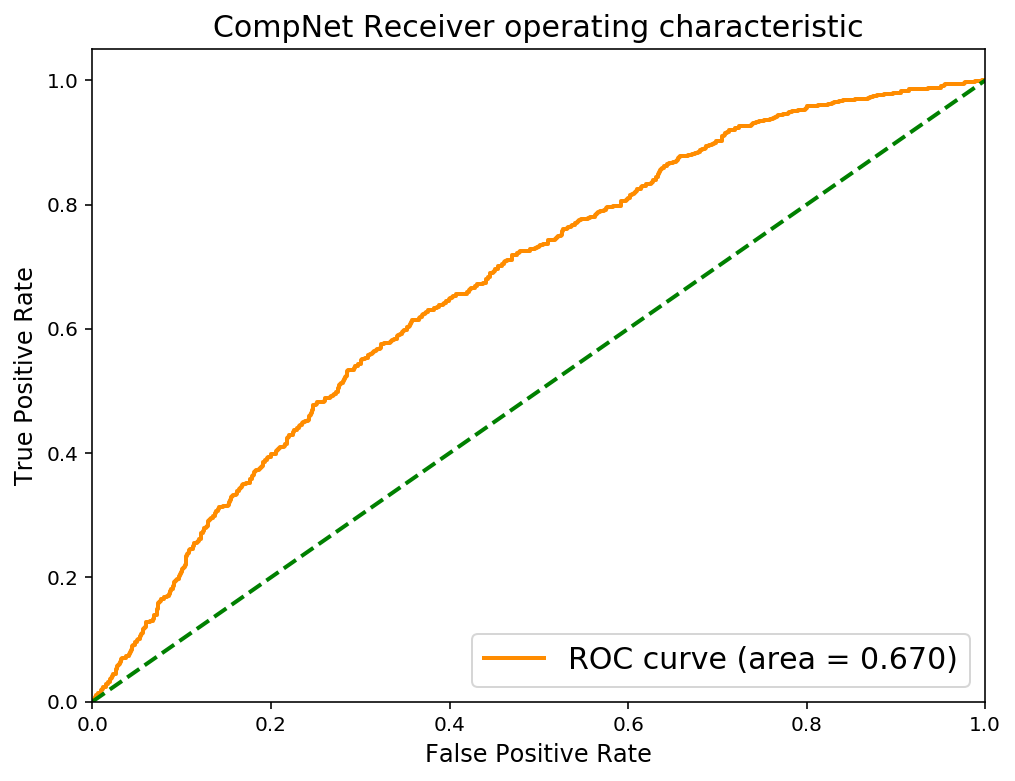

(34.876962661743164, 39.71423667669296, 643.0, 488.0, 265.0, 420.0, 57, 908)

In [35]:
# evaluate compnet
eval_compnet(mn_compnet, test_encoding_ds)

### Train Ensemble CompNet1 on ModelNet10 Data

In [36]:
ensemble_HP = HyperParameter(epochs=20, batch_size=16, lr=0.001)

# Train with the ensemble net
ensemble1 = train_compnet(ensemble_HP, DS,
                           train_ds=train_encoding_ds,
                           save_wt_fname='mnet_ensemble1.pth',
                           compnet=EnsembleCompNet())

Epoch: 0. batch_idx: 100
Loss:  0.8232969856262207 0.5922397673130035
Epoch: 0. batch_idx: 200
Loss:  0.6904217094182968 0.6920903533697128


/home/mmvc/.conda/envs/sss_pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 1. batch_idx: 100
Loss:  0.6471084064245224 0.7416933232545853
Epoch: 1. batch_idx: 200
Loss:  0.6324504315853119 0.7334627109766007
Epoch: 2. batch_idx: 100
Loss:  0.622427243590355 0.7391416007280349
Epoch: 2. batch_idx: 200
Loss:  0.5912148159742355 0.7343465757369995
Epoch: 3. batch_idx: 100
Loss:  0.5866927427053451 0.7138078647851944
Epoch: 3. batch_idx: 200
Loss:  0.5596957540512085 0.7074498438835144
Epoch: 4. batch_idx: 100
Loss:  0.5726362103223801 0.6600993424654007
Epoch: 4. batch_idx: 200
Loss:  0.5432688701152801 0.6489680662751198
Epoch: 5. batch_idx: 100
Loss:  0.521248639523983 0.6594493815302849
Epoch: 5. batch_idx: 200
Loss:  0.5109288342297077 0.6100374427437782
Epoch: 6. batch_idx: 100
Loss:  0.4930486363172531 0.6164325255155564
Epoch: 6. batch_idx: 200
Loss:  0.471568006426096 0.6200958976149559
Epoch: 7. batch_idx: 100
Loss:  0.4782050949335098 0.6048099833726883
Epoch: 7. batch_idx: 200
Loss:  0.48161530315876006 0.5943339338898659
Epoch: 8. batch_idx: 1

### Evaluate Ensemble CompNet1 on ModelNet10 Data

------------------ Evaluation Report ------------------
Total Accuracy: 0.7538546255506607
After 57 batches and 908 test points

Metrics for the same class:
Avg loss: 0.38564061281973855
Precision: 0.711662075298439
Recall: 0.8535242290748899
F1 Score: 0.7761642463695543

Metrics for the diff class:
Avg loss: 0.6340307277022746
Precision: 0.8170563961485557
Recall: 0.6541850220264317
F1 Score: 0.7266055045871559


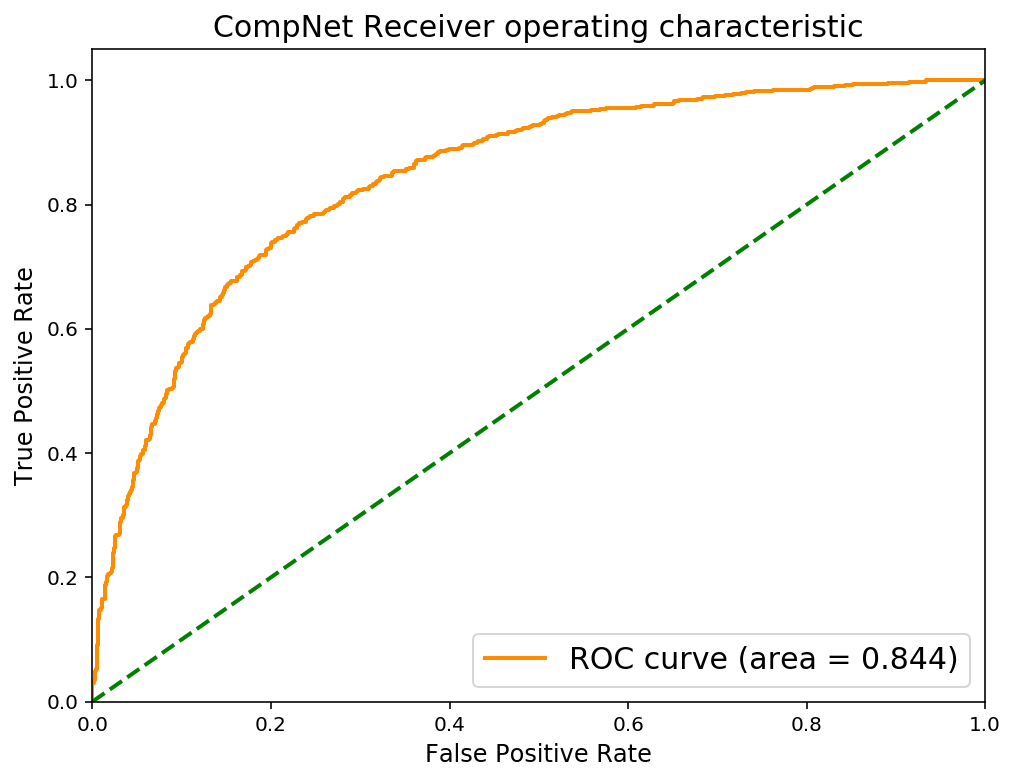

(21.981514930725098, 36.139751479029655, 775.0, 594.0, 133.0, 314.0, 57, 908)

In [37]:
eval_compnet(ensemble1, test_encoding_ds)

# Training out autodecoder and Ensemble CompNets on ModelNet40 data with 33 classes

In [26]:
# Load the X_train, X_test, y_train, y_test after reading from the .npy file in the disk
train40 = './data/ModelNet40_train_npy/'
test40 = './data/ModelNet40_test_npy/'

# Warning: The train and test directories must have the same number of files
X_train40, y_train40 = get_X_y_from_npy(train40, 100)
X_test40, y_test40 = get_X_y_from_npy(test40, 100)

X_train40.shape, X_test40.shape, y_train40.shape, y_test40.shape

Adding data/ModelNet40_train_npy/modelnet_flower_pot.npy to X. X is now (149, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_tv_stand.npy to X. X is now (416, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_mantel.npy to X. X is now (700, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_tent.npy to X. X is now (863, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_chair.npy to X. X is now (1752, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_airplane.npy to X. X is now (2378, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_keyboard.npy to X. X is now (2523, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_person.npy to X. X is now (2611, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_bowl.npy to X. X is now (2675, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_door.npy to X. X is now (2784, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_lamp.npy to X. X is now (2908, 5000, 3)
Adding data/ModelNet40_train_npy/modelnet_xbox.npy to X. X is now (3011, 5000, 

((7598, 5000, 3), (1860, 5000, 3), (7598, 1), (1860, 1))

## Looking at ModelNet40 3D images

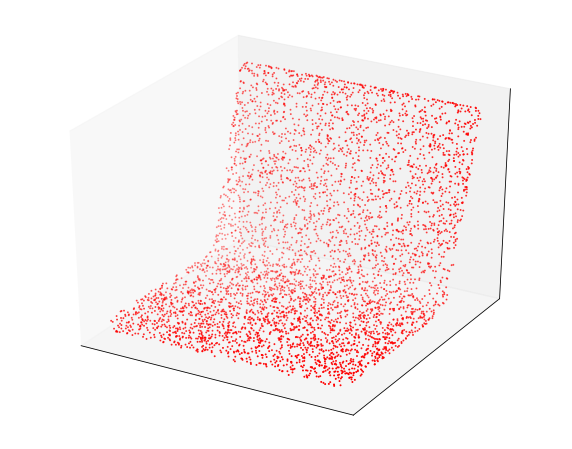

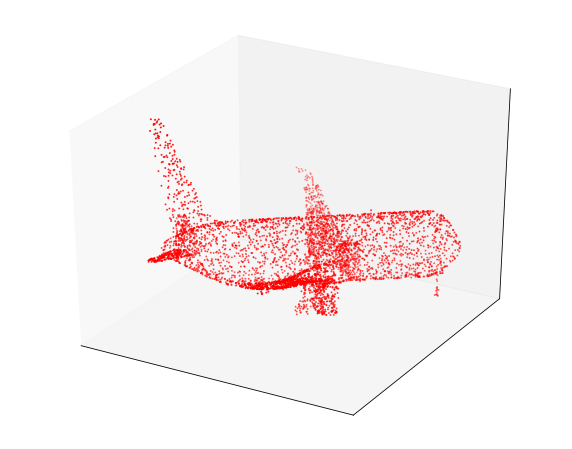

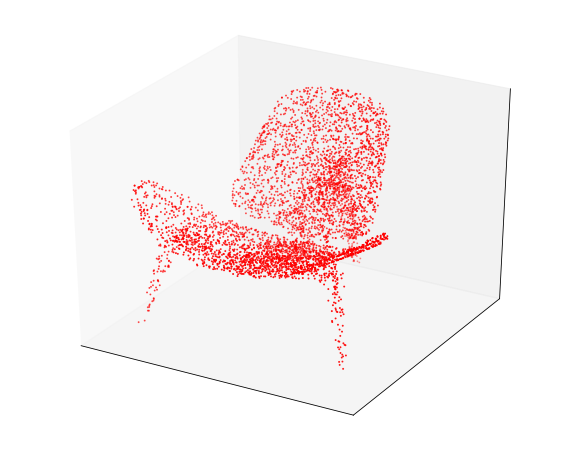

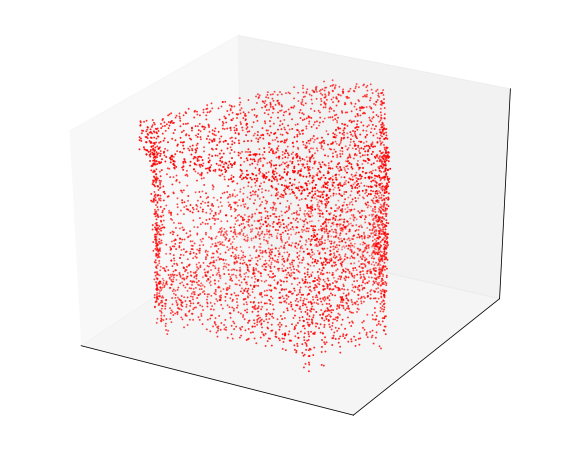

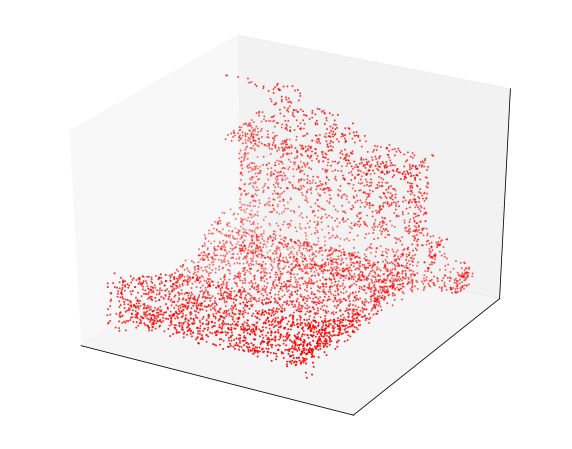

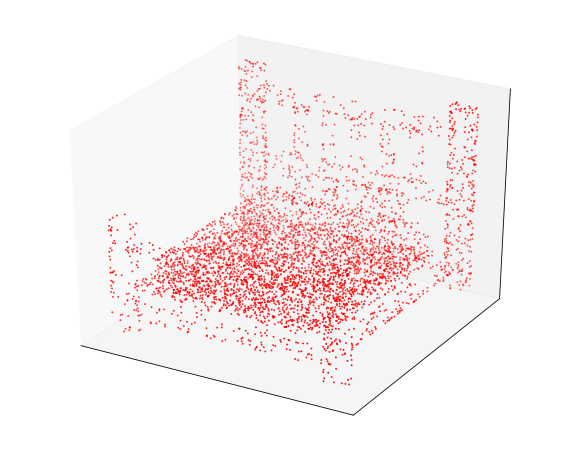

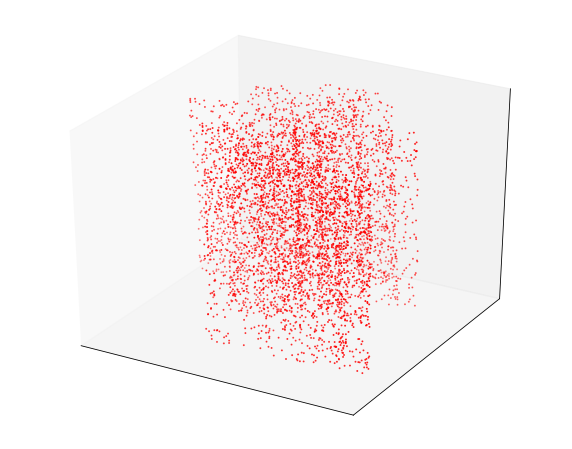

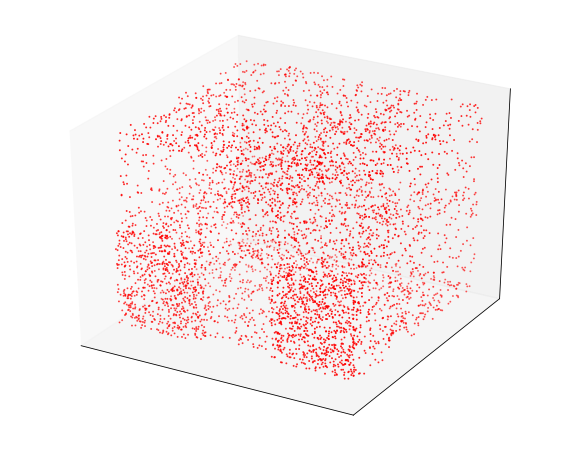

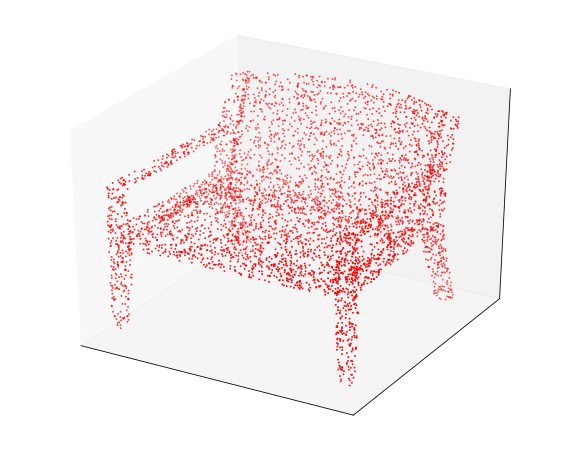

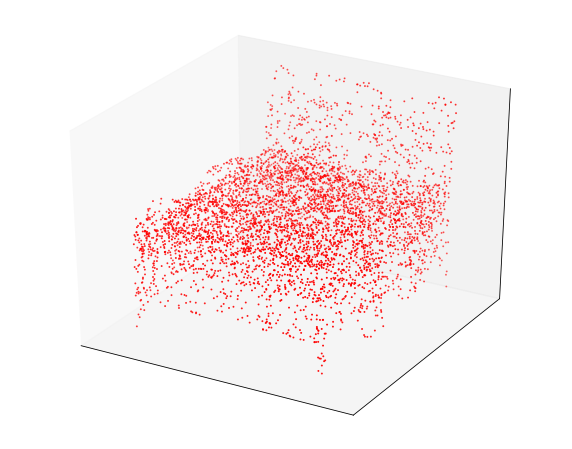

In [28]:
for i in range(10):
    visualize_npy(X_train40[i], save_img_fpath=f'./img/modelnet40_{i}.png')

## Training the autodecoder and generating the latent space encodings

In [29]:
adnet_HP40 = HyperParameter(lr=0.001, epochs=4)
train_ds40 = PointDriftDS(X_train40, y_train40)
test_ds40 = PointDriftDS(X_test40, y_test40)

# train autodecoder
mn40_autodecoder = train_decoder(adnet_HP40, DS, train_ds=train_ds40,
                                 save_wt_fname='mnet40_decoder.pth')

# get the train encodings
train_encoding_ds40 = EncodingDS(PointDriftDS(
    X_train40, y_train40), mn40_autodecoder)
train_result40 = train_encoding_ds40.train_encodings(
    find_encoding, num_iterations=15, lr=0.05)

# get the test encodings
test_encoding_ds40 = EncodingDS(PointDriftDS(
    X_test40, y_test40), mn40_autodecoder)
test_result40 = test_encoding_ds40.train_encodings(
    find_encoding, num_iterations=15, lr=0.05)

Epoch: 0. batch_idx: 100
Loss:  86324044443.20941 85138882920.23282
Epoch: 0. batch_idx: 200
Loss:  16746996648650.266 16836227234209.332
0 1622997.1 tensor(7.2848, device='cuda:0', grad_fn=<NormBackward0>)
0 2621187.8 tensor(7.3053, device='cuda:0', grad_fn=<NormBackward0>)
0 358480480.0 tensor(7.2937, device='cuda:0', grad_fn=<NormBackward0>)
0 5431981600.0 tensor(7.2434, device='cuda:0', grad_fn=<NormBackward0>)
0 2094863000.0 tensor(7.2330, device='cuda:0', grad_fn=<NormBackward0>)
0 3222735.5 tensor(7.2945, device='cuda:0', grad_fn=<NormBackward0>)
0 25776434.0 tensor(7.2462, device='cuda:0', grad_fn=<NormBackward0>)
0 5838097.0 tensor(7.2054, device='cuda:0', grad_fn=<NormBackward0>)
0 74170.46 tensor(7.2289, device='cuda:0', grad_fn=<NormBackward0>)
0 3893157.5 tensor(7.1888, device='cuda:0', grad_fn=<NormBackward0>)
0 7765265400.0 tensor(7.2800, device='cuda:0', grad_fn=<NormBackward0>)
0 8469867.0 tensor(7.2397, device='cuda:0', grad_fn=<NormBackward0>)
0 1200646.6 tensor(7.23

0 1810246.4 tensor(2.6103, device='cuda:0', grad_fn=<NormBackward0>)
0 231590.05 tensor(2.5927, device='cuda:0', grad_fn=<NormBackward0>)
Encodings trained
Eval:  (2286438471.993975, 1588564678.6573093)
Epoch: 1. batch_idx: 100
Loss:  5095048116.669609 1978824609.9517188
Epoch: 1. batch_idx: 200
Loss:  12543048446557.607 12543392696052.867
Epoch: 2. batch_idx: 100
Loss:  5581409856.77541 90012647219.86523
Epoch: 2. batch_idx: 200
Loss:  2525050227505.7485 2525390802660.3394
Epoch: 3. batch_idx: 100
Loss:  35026667355.330315 122022234098.93678
Epoch: 3. batch_idx: 200
Loss:  3762527912.4692187 1383404927.7980468
0 235187.69 tensor(5.0477, device='cuda:0', grad_fn=<NormBackward0>)
0 604710.3 tensor(5.1052, device='cuda:0', grad_fn=<NormBackward0>)
0 473413.5 tensor(5.0750, device='cuda:0', grad_fn=<NormBackward0>)
0 168729.38 tensor(5.0054, device='cuda:0', grad_fn=<NormBackward0>)
0 3237331.2 tensor(5.1171, device='cuda:0', grad_fn=<NormBackward0>)
0 3074490.2 tensor(5.0928, device='cud

0 94685816.0 tensor(5.0775, device='cuda:0', grad_fn=<NormBackward0>)
0 393757.7 tensor(5.1214, device='cuda:0', grad_fn=<NormBackward0>)
0 273080580.0 tensor(5.1006, device='cuda:0', grad_fn=<NormBackward0>)
0 42513.008 tensor(5.0059, device='cuda:0', grad_fn=<NormBackward0>)
0 57073332.0 tensor(5.1386, device='cuda:0', grad_fn=<NormBackward0>)
0 73855.12 tensor(5.1241, device='cuda:0', grad_fn=<NormBackward0>)
0 39920.957 tensor(5.1525, device='cuda:0', grad_fn=<NormBackward0>)
0 91513.62 tensor(5.0688, device='cuda:0', grad_fn=<NormBackward0>)
0 6015317.5 tensor(5.1322, device='cuda:0', grad_fn=<NormBackward0>)
0 603051.56 tensor(5.0191, device='cuda:0', grad_fn=<NormBackward0>)
0 95656.22 tensor(5.0959, device='cuda:0', grad_fn=<NormBackward0>)
0 354340.5 tensor(5.0008, device='cuda:0', grad_fn=<NormBackward0>)
0 306048.22 tensor(5.0859, device='cuda:0', grad_fn=<NormBackward0>)
0 619012.25 tensor(5.0635, device='cuda:0', grad_fn=<NormBackward0>)
0 10111180.0 tensor(5.0786, device=

0 24410788.0 tensor(5.0954, device='cuda:0', grad_fn=<NormBackward0>)
0 15332789.0 tensor(5.0889, device='cuda:0', grad_fn=<NormBackward0>)
0 567933.44 tensor(5.2227, device='cuda:0', grad_fn=<NormBackward0>)
0 2637197.0 tensor(5.0649, device='cuda:0', grad_fn=<NormBackward0>)
0 52017940.0 tensor(5.1676, device='cuda:0', grad_fn=<NormBackward0>)
0 138422.62 tensor(5.1744, device='cuda:0', grad_fn=<NormBackward0>)
0 738096.8 tensor(5.1448, device='cuda:0', grad_fn=<NormBackward0>)
0 24568976.0 tensor(5.0311, device='cuda:0', grad_fn=<NormBackward0>)
0 24114658.0 tensor(5.0158, device='cuda:0', grad_fn=<NormBackward0>)
0 166695060.0 tensor(5.1040, device='cuda:0', grad_fn=<NormBackward0>)
0 74907950000.0 tensor(5.0700, device='cuda:0', grad_fn=<NormBackward0>)
0 41684610.0 tensor(5.1073, device='cuda:0', grad_fn=<NormBackward0>)
0 67792.65 tensor(5.0798, device='cuda:0', grad_fn=<NormBackward0>)
0 17588241000000.0 tensor(5.1639, device='cuda:0', grad_fn=<NormBackward0>)
0 157666.17 tenso

0 2097994600.0 tensor(5.1140, device='cuda:0', grad_fn=<NormBackward0>)
0 237948.52 tensor(5.0443, device='cuda:0', grad_fn=<NormBackward0>)
0 10788093.0 tensor(5.0478, device='cuda:0', grad_fn=<NormBackward0>)
0 4709177.0 tensor(5.1786, device='cuda:0', grad_fn=<NormBackward0>)
0 9363101000.0 tensor(5.1381, device='cuda:0', grad_fn=<NormBackward0>)
0 359376.16 tensor(5.0970, device='cuda:0', grad_fn=<NormBackward0>)
0 288370.9 tensor(5.0960, device='cuda:0', grad_fn=<NormBackward0>)
0 76100.62 tensor(5.1398, device='cuda:0', grad_fn=<NormBackward0>)
0 237976.73 tensor(5.1288, device='cuda:0', grad_fn=<NormBackward0>)
0 834031.4 tensor(5.1458, device='cuda:0', grad_fn=<NormBackward0>)
0 2550234.0 tensor(5.0922, device='cuda:0', grad_fn=<NormBackward0>)
0 24923.307 tensor(5.1313, device='cuda:0', grad_fn=<NormBackward0>)
0 426284.2 tensor(5.0386, device='cuda:0', grad_fn=<NormBackward0>)
0 143373380.0 tensor(5.0814, device='cuda:0', grad_fn=<NormBackward0>)
0 143521460.0 tensor(5.0791, 

0 2473870.2 tensor(5.2168, device='cuda:0', grad_fn=<NormBackward0>)
0 2347775.8 tensor(5.0517, device='cuda:0', grad_fn=<NormBackward0>)
0 118226.91 tensor(5.0698, device='cuda:0', grad_fn=<NormBackward0>)
0 268966.47 tensor(5.1747, device='cuda:0', grad_fn=<NormBackward0>)
0 162265.88 tensor(5.1002, device='cuda:0', grad_fn=<NormBackward0>)
0 364176.72 tensor(5.0896, device='cuda:0', grad_fn=<NormBackward0>)
0 82090.484 tensor(5.1573, device='cuda:0', grad_fn=<NormBackward0>)
0 113163.27 tensor(5.0567, device='cuda:0', grad_fn=<NormBackward0>)
0 640768.9 tensor(5.0438, device='cuda:0', grad_fn=<NormBackward0>)
0 3942785.8 tensor(5.1365, device='cuda:0', grad_fn=<NormBackward0>)
0 424915.0 tensor(5.0721, device='cuda:0', grad_fn=<NormBackward0>)
0 2302406400.0 tensor(5.1164, device='cuda:0', grad_fn=<NormBackward0>)
0 207891.58 tensor(5.0792, device='cuda:0', grad_fn=<NormBackward0>)
0 150372.2 tensor(5.1105, device='cuda:0', grad_fn=<NormBackward0>)
0 2058749.1 tensor(5.0955, device=

0 32949040000.0 tensor(5.1431, device='cuda:0', grad_fn=<NormBackward0>)
0 96122936.0 tensor(5.0400, device='cuda:0', grad_fn=<NormBackward0>)
0 26604490.0 tensor(5.1304, device='cuda:0', grad_fn=<NormBackward0>)
0 511080.4 tensor(5.0563, device='cuda:0', grad_fn=<NormBackward0>)
0 531978.44 tensor(5.1907, device='cuda:0', grad_fn=<NormBackward0>)
0 64870240.0 tensor(5.1174, device='cuda:0', grad_fn=<NormBackward0>)
0 151941.88 tensor(4.9926, device='cuda:0', grad_fn=<NormBackward0>)
0 86002.56 tensor(5.0246, device='cuda:0', grad_fn=<NormBackward0>)
0 107442.06 tensor(5.1178, device='cuda:0', grad_fn=<NormBackward0>)
0 1645545.1 tensor(5.1038, device='cuda:0', grad_fn=<NormBackward0>)
0 234259.38 tensor(4.9998, device='cuda:0', grad_fn=<NormBackward0>)
0 15266.9 tensor(5.1343, device='cuda:0', grad_fn=<NormBackward0>)
0 50776.555 tensor(5.0544, device='cuda:0', grad_fn=<NormBackward0>)
0 20507.234 tensor(5.0635, device='cuda:0', grad_fn=<NormBackward0>)
0 135848.53 tensor(5.1237, devi

0 897077400000000.0 tensor(5.1317, device='cuda:0', grad_fn=<NormBackward0>)
0 897074300000000.0 tensor(5.1400, device='cuda:0', grad_fn=<NormBackward0>)
0 44787.2 tensor(5.1258, device='cuda:0', grad_fn=<NormBackward0>)
0 185711.88 tensor(5.1275, device='cuda:0', grad_fn=<NormBackward0>)
0 8462520.0 tensor(5.1853, device='cuda:0', grad_fn=<NormBackward0>)
0 8652019.0 tensor(5.1327, device='cuda:0', grad_fn=<NormBackward0>)
0 133033420.0 tensor(5.2032, device='cuda:0', grad_fn=<NormBackward0>)
0 161313300.0 tensor(5.0706, device='cuda:0', grad_fn=<NormBackward0>)
0 15914.571 tensor(5.0558, device='cuda:0', grad_fn=<NormBackward0>)
0 65911770.0 tensor(5.1592, device='cuda:0', grad_fn=<NormBackward0>)
0 49975.027 tensor(5.0934, device='cuda:0', grad_fn=<NormBackward0>)
0 197641.72 tensor(5.1098, device='cuda:0', grad_fn=<NormBackward0>)
0 216293.4 tensor(5.1846, device='cuda:0', grad_fn=<NormBackward0>)
0 171707.69 tensor(5.1428, device='cuda:0', grad_fn=<NormBackward0>)
0 114376.484 ten

0 326461.72 tensor(5.0786, device='cuda:0', grad_fn=<NormBackward0>)
0 476953.56 tensor(5.0471, device='cuda:0', grad_fn=<NormBackward0>)
0 524816300.0 tensor(5.0993, device='cuda:0', grad_fn=<NormBackward0>)
0 12738.451 tensor(5.1503, device='cuda:0', grad_fn=<NormBackward0>)
0 89072.84 tensor(5.0814, device='cuda:0', grad_fn=<NormBackward0>)
0 118765.836 tensor(5.1130, device='cuda:0', grad_fn=<NormBackward0>)
0 2962.4783 tensor(5.0931, device='cuda:0', grad_fn=<NormBackward0>)
0 74866.65 tensor(5.0791, device='cuda:0', grad_fn=<NormBackward0>)
0 391211.1 tensor(5.1557, device='cuda:0', grad_fn=<NormBackward0>)
0 898994.56 tensor(5.0179, device='cuda:0', grad_fn=<NormBackward0>)
0 22626.055 tensor(5.0255, device='cuda:0', grad_fn=<NormBackward0>)
0 22862486.0 tensor(5.0310, device='cuda:0', grad_fn=<NormBackward0>)
0 262242.25 tensor(5.0592, device='cuda:0', grad_fn=<NormBackward0>)
0 695991.06 tensor(5.0799, device='cuda:0', grad_fn=<NormBackward0>)
0 76031670.0 tensor(5.1104, devic

0 92722.03 tensor(5.1917, device='cuda:0', grad_fn=<NormBackward0>)
0 35415.94 tensor(5.1858, device='cuda:0', grad_fn=<NormBackward0>)
0 205484.27 tensor(5.1623, device='cuda:0', grad_fn=<NormBackward0>)
0 9321491000.0 tensor(5.1825, device='cuda:0', grad_fn=<NormBackward0>)
0 346539.22 tensor(5.1663, device='cuda:0', grad_fn=<NormBackward0>)
0 285544.3 tensor(5.0931, device='cuda:0', grad_fn=<NormBackward0>)
0 301934.25 tensor(5.1717, device='cuda:0', grad_fn=<NormBackward0>)
0 1267099.0 tensor(4.7566, device='cuda:0', grad_fn=<NormBackward0>)
0 194239.03 tensor(4.7877, device='cuda:0', grad_fn=<NormBackward0>)
Encodings trained
0 502458.22 tensor(5.0828, device='cuda:0', grad_fn=<NormBackward0>)
0 452478.75 tensor(5.0534, device='cuda:0', grad_fn=<NormBackward0>)
0 698702.75 tensor(5.1534, device='cuda:0', grad_fn=<NormBackward0>)
0 860939.94 tensor(5.1440, device='cuda:0', grad_fn=<NormBackward0>)
0 421604670.0 tensor(5.1730, device='cuda:0', grad_fn=<NormBackward0>)
0 425540450.0 

0 190730.11 tensor(5.1507, device='cuda:0', grad_fn=<NormBackward0>)
0 13719617.0 tensor(5.1498, device='cuda:0', grad_fn=<NormBackward0>)
0 302244.28 tensor(5.1535, device='cuda:0', grad_fn=<NormBackward0>)
0 916394.25 tensor(5.0745, device='cuda:0', grad_fn=<NormBackward0>)
0 1016066.44 tensor(5.1328, device='cuda:0', grad_fn=<NormBackward0>)
0 8650223.0 tensor(5.0608, device='cuda:0', grad_fn=<NormBackward0>)
0 10607745.0 tensor(5.0756, device='cuda:0', grad_fn=<NormBackward0>)
0 91258.805 tensor(5.1971, device='cuda:0', grad_fn=<NormBackward0>)
0 174063.25 tensor(5.1441, device='cuda:0', grad_fn=<NormBackward0>)
0 81280.055 tensor(5.0138, device='cuda:0', grad_fn=<NormBackward0>)
0 88925.24 tensor(5.0293, device='cuda:0', grad_fn=<NormBackward0>)
0 35315560000.0 tensor(5.0769, device='cuda:0', grad_fn=<NormBackward0>)
0 23735480000.0 tensor(5.1269, device='cuda:0', grad_fn=<NormBackward0>)
0 10132307000.0 tensor(5.1740, device='cuda:0', grad_fn=<NormBackward0>)
0 77494.33 tensor(5.

0 4900747.0 tensor(5.0947, device='cuda:0', grad_fn=<NormBackward0>)
0 1128544.2 tensor(5.0819, device='cuda:0', grad_fn=<NormBackward0>)
0 10794689.0 tensor(5.1676, device='cuda:0', grad_fn=<NormBackward0>)
0 159621.4 tensor(5.1150, device='cuda:0', grad_fn=<NormBackward0>)
0 7861619.0 tensor(5.0715, device='cuda:0', grad_fn=<NormBackward0>)
0 43481220.0 tensor(2.5818, device='cuda:0', grad_fn=<NormBackward0>)
0 388119.78 tensor(2.5777, device='cuda:0', grad_fn=<NormBackward0>)
Encodings trained


## Train a single CompNet for classification on the ModelNet40 data

In [43]:
# train the compnet
compnet_HP40 = HyperParameter(epochs=50, batch_size=16, lr=0.001)
mn40_compnet = train_compnet(compnet_HP40, DS,
                           train_ds=train_encoding_ds40,
                           save_wt_fname='mnet40_compnet.pth',)

Epoch: 0. batch_idx: 100
Loss:  0.6706315255165101 0.6651436066627503
Epoch: 0. batch_idx: 200
Loss:  0.6579265969991684 0.650756966471672
Epoch: 0. batch_idx: 300
Loss:  0.6485432389378548 0.6508988821506501
Epoch: 0. batch_idx: 400
Loss:  0.646351107954979 0.6419335824251174
------------------ Evaluation Report ------------------
Total Accuracy: 0.5989247311827957
After 117 batches and 1860 test points

Metrics for the same class:
Avg loss: 0.7155416021999131
Precision: 0.6520661157024793
Recall: 0.4241935483870968
F1 Score: 0.5140065146579804

Metrics for the diff class:
Avg loss: 0.610985120646974
Precision: 0.5733067729083665
Recall: 0.7736559139784946
F1 Score: 0.6585812356979406
Eval:  (83.71836745738983, 71.48525911569595, 789.0, 1439.0, 1071.0, 421.0, 117, 1860)
Epoch: 1. batch_idx: 100
Loss:  0.6484219056367874 0.6427287599444389
Epoch: 1. batch_idx: 200
Loss:  0.6458016151189804 0.640463260114193
Epoch: 1. batch_idx: 300
Loss:  0.6455919030308723 0.625073070526123
Epoch: 1. 

Epoch: 21. batch_idx: 200
Loss:  0.5810015547275543 0.572503972351551
Epoch: 21. batch_idx: 300
Loss:  0.5949592995643616 0.5711961448192596
Epoch: 21. batch_idx: 400
Loss:  0.5774470150470734 0.5712430000305175
Epoch: 22. batch_idx: 100
Loss:  0.5934355014562607 0.5704639130830764
Epoch: 22. batch_idx: 200
Loss:  0.5831020200252532 0.5611265882849693
Epoch: 22. batch_idx: 300
Loss:  0.5809882670640946 0.566157263815403
Epoch: 22. batch_idx: 400
Loss:  0.5887716546654701 0.58977654337883
Epoch: 23. batch_idx: 100
Loss:  0.5831681349873543 0.5620106008648872
Epoch: 23. batch_idx: 200
Loss:  0.5901613005995751 0.5683020183444023
Epoch: 23. batch_idx: 300
Loss:  0.5686136493086815 0.5584403815865516
Epoch: 23. batch_idx: 400
Loss:  0.585679449737072 0.5734484279155732
Epoch: 24. batch_idx: 100
Loss:  0.58252920627594 0.5722089436650276
Epoch: 24. batch_idx: 200
Loss:  0.5762372556328773 0.5432990679144859
Epoch: 24. batch_idx: 300
Loss:  0.5779837647080421 0.5725222086906433
Epoch: 24. ba

Epoch: 43. batch_idx: 300
Loss:  0.5450673520565033 0.524986344575882
Epoch: 43. batch_idx: 400
Loss:  0.5338633847236633 0.5282472512125969
Epoch: 44. batch_idx: 100
Loss:  0.5407550457119942 0.51480319917202
Epoch: 44. batch_idx: 200
Loss:  0.5292737996578216 0.5327289789915085
Epoch: 44. batch_idx: 300
Loss:  0.5440478953719139 0.524770148396492
Epoch: 44. batch_idx: 400
Loss:  0.5290664261579514 0.5218536871671676
Epoch: 45. batch_idx: 100
Loss:  0.5529514235258103 0.5357238790392875
Epoch: 45. batch_idx: 200
Loss:  0.5172852373123169 0.5134782510995864
Epoch: 45. batch_idx: 300
Loss:  0.549301110804081 0.5296545347571373
Epoch: 45. batch_idx: 400
Loss:  0.5264385110139846 0.5119366148114204
------------------ Evaluation Report ------------------
Total Accuracy: 0.6115591397849462
After 117 batches and 1860 test points

Metrics for the same class:
Avg loss: 0.7204963172602857
Precision: 0.620569436374201
Recall: 0.5741935483870968
F1 Score: 0.5964814297682213

Metrics for the diff 

### Evaluate Single CompNet on ModelNet40 Data

In [44]:
eval_compnet(mn40_compnet, test_encoding_ds40)

------------------ Evaluation Report ------------------
Total Accuracy: 0.603225806451613
After 117 batches and 1860 test points

Metrics for the same class:
Avg loss: 0.8350983893769419
Precision: 0.6348314606741573
Recall: 0.4860215053763441
F1 Score: 0.5505481120584653

Metrics for the diff class:
Avg loss: 0.5771344566447103
Precision: 0.5836236933797909
Recall: 0.7204301075268817
F1 Score: 0.6448508180943214


(97.7065115571022, 67.5247314274311, 904.0, 1340.0, 956.0, 520.0, 117, 1860)

## Train Ensemble Compnet1 on ModelNet40 data

In [45]:
ensemble_HP40 = HyperParameter(epochs=50, batch_size=16, lr=0.001)

# Train with the ensemble net
ensemble1_40 = train_compnet(ensemble_HP40, DS,
                           train_ds=train_encoding_ds40,
                           save_wt_fname='mnet40_ensemble1.pth',
                           compnet=EnsembleCompNet())

Epoch: 0. batch_idx: 100
Loss:  0.8238329643011093 0.5924645757675171
Epoch: 0. batch_idx: 200
Loss:  0.7154935473203659 0.6690211951732635
Epoch: 0. batch_idx: 300
Loss:  0.6575813513994216 0.7150458943843842
Epoch: 0. batch_idx: 400
Loss:  0.6142687046527863 0.7234216034412384
------------------ Evaluation Report ------------------
Total Accuracy: 0.6204301075268818
After 117 batches and 1860 test points

Metrics for the same class:
Avg loss: 0.5878888707385104
Precision: 0.5934891485809682
Recall: 0.7645161290322581
F1 Score: 0.6682330827067668

Metrics for the diff class:
Avg loss: 0.7293012274636163
Precision: 0.6691842900302115
Recall: 0.47634408602150535
F1 Score: 0.5565326633165829
Eval:  (68.78299787640572, 85.3282436132431, 1422.0, 886.0, 438.0, 974.0, 117, 1860)
Epoch: 1. batch_idx: 100
Loss:  0.5812584012746811 0.7015246212482452
Epoch: 1. batch_idx: 200
Loss:  0.5400733157992363 0.678021132349968
Epoch: 1. batch_idx: 300
Loss:  0.5602761533856392 0.6634456732869148
Epoch: 

Epoch: 21. batch_idx: 100
Loss:  0.43105732979252936 0.4203683602809906
Epoch: 21. batch_idx: 200
Loss:  0.4019203633069992 0.3711982551217079
Epoch: 21. batch_idx: 300
Loss:  0.38831015781499445 0.35303890094161033
Epoch: 21. batch_idx: 400
Loss:  0.392736347084865 0.36663948237895966
Epoch: 22. batch_idx: 100
Loss:  0.4118328478001058 0.3625849413871765
Epoch: 22. batch_idx: 200
Loss:  0.4255896055046469 0.39743453286588193
Epoch: 22. batch_idx: 300
Loss:  0.4249343842919916 0.39701873444020747
Epoch: 22. batch_idx: 400
Loss:  0.39087271576747296 0.33862672701478
Epoch: 23. batch_idx: 100
Loss:  0.4123729960620403 0.38991485558450223
Epoch: 23. batch_idx: 200
Loss:  0.3846948322560638 0.3390611071139574
Epoch: 23. batch_idx: 300
Loss:  0.3853601654805243 0.38345769576728345
Epoch: 23. batch_idx: 400
Loss:  0.3880147504247725 0.37394204035401346
Epoch: 24. batch_idx: 100
Loss:  0.44545300997793674 0.3591653053462505
Epoch: 24. batch_idx: 200
Loss:  0.37661146216094493 0.36576726697385

Epoch: 42. batch_idx: 300
Loss:  0.3540827711042948 0.32620312318205835
Epoch: 42. batch_idx: 400
Loss:  0.3640272863116115 0.29885581977665426
Epoch: 43. batch_idx: 100
Loss:  0.31909137554001066 0.2911474435776472
Epoch: 43. batch_idx: 200
Loss:  0.4161754272133112 0.29233460627496244
Epoch: 43. batch_idx: 300
Loss:  0.33171067013405264 0.30153984621167185
Epoch: 43. batch_idx: 400
Loss:  0.3335988350771368 0.3156319162994623
Epoch: 44. batch_idx: 100
Loss:  0.3441853952407837 0.28568470664322376
Epoch: 44. batch_idx: 200
Loss:  0.37272995575214735 0.2745394487679005
Epoch: 44. batch_idx: 300
Loss:  0.3624931503739208 0.30055277310311795
Epoch: 44. batch_idx: 400
Loss:  0.37045905081089586 0.3474190584570169
Epoch: 45. batch_idx: 100
Loss:  0.34971957762725653 0.3141831398755312
Epoch: 45. batch_idx: 200
Loss:  0.3492181002954021 0.2945318524539471
Epoch: 45. batch_idx: 300
Loss:  0.31466301721520723 0.29244460932910443
Epoch: 45. batch_idx: 400
Loss:  0.33803795317187907 0.297544150

### Evaluate Ensemble CompNet1 on ModelNet40 Data

In [46]:
eval_compnet(ensemble1_40, test_encoding_ds40)

------------------ Evaluation Report ------------------
Total Accuracy: 0.7397849462365591
After 117 batches and 1860 test points

Metrics for the same class:
Avg loss: 0.44892520677202785
Precision: 0.7263959390862944
Recall: 0.7693548387096775
F1 Score: 0.7472584856396867

Metrics for the diff class:
Avg loss: 0.6485624200640581
Precision: 0.7548571428571429
Recall: 0.7102150537634409
F1 Score: 0.7318559556786703


(52.52424919232726, 75.8818031474948, 1431.0, 1321.0, 429.0, 539.0, 117, 1860)